<a href="https://colab.research.google.com/github/cyberdreams8/water-quality-analysis-and-prediction-2/blob/main/modified_water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the necessary liabraries

In [478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Reading the Dataset

In [479]:
Dataset = pd.read_csv("https://raw.githubusercontent.com/cyberdreams8/water-quality-analysis-and-prediction-2/refs/heads/main/water_quality_dataset.csv")
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680,Drinkable
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813,Not Drinkable
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732,Not Drinkable
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474,Not Drinkable
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151,Not Drinkable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138,Not Drinkable
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,NaN,5.193830,230.164378,234.763384,Not Drinkable
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151,Not Drinkable
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982,Not Drinkable


In [480]:
# prompt: drop potability column

Dataset = Dataset.drop('Potability', axis=1)
Dataset


,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L)
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,NaN,5.193830,230.164378,234.763384
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982


In [481]:
Dataset.columns

Index(['Unnamed: 0', 'Station Code', 'Station Name', 'STATE',
       'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max', 'Year',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)'],
      dtype='object')

In [482]:
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L)
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,NaN,5.193830,230.164378,234.763384
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982


In [483]:
Dataset.head()

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L)
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151


In [484]:
Dataset.tail()

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L)
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.2,7.9,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.3,7.4,1435.0,1730.0,2021,4.675666,NaN,5.193830,230.164378,234.763384
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.3,7.3,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.2,7.6,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982
6315,987,2535.0,VISVA BHARATI,WEST BENGAL,30.0,31.0,7.9,8.2,370.0,437.0,2021,0.678409,4.987829,5.729190,578.810775,51.550765


##Sanity Check of Data

In [485]:
Dataset.shape

(6316, 16)

In [486]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   6316 non-null   int64  
 1   Station Code                 6240 non-null   float64
 2   Station Name                 6267 non-null   object 
 3   STATE                        6241 non-null   object 
 4   Temperature Min              5818 non-null   float64
 5   Temperature Max              5818 non-null   float64
 6   pH Min                       6195 non-null   float64
 7   pH Max                       6195 non-null   float64
 8   Conductivity (µmhos/cm) Min  6124 non-null   float64
 9   Conductivity (µmhos/cm) Max  6124 non-null   float64
 10  Year                         6316 non-null   int64  
 11  Turbidity (NTU)              6255 non-null   float64
 12  Dissolved Oxygen (mg/L)      6253 non-null   float64
 13  BOD (mg/L)        

In [487]:
#finding missing values
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,498
Temperature Max,498
pH Min,121
pH Max,121
Conductivity (µmhos/cm) Min,192
Conductivity (µmhos/cm) Max,192


In [488]:
#finding missing values in percentage
Dataset.isnull().sum()/Dataset.shape[0]*100

,0
Unnamed: 0,0.000000
Station Code,1.203293
Station Name,0.775807
STATE,1.187460
Temperature Min,7.884737
Temperature Max,7.884737
pH Min,1.915769
pH Max,1.915769
Conductivity (µmhos/cm) Min,3.039899
Conductivity (µmhos/cm) Max,3.039899


In [489]:
#finding duplicates
Dataset.duplicated().sum()

0

In [490]:
#identifying garbage values
for i in Dataset.select_dtypes(include='object').columns:
  print(Dataset[i].value_counts())
  print("***"*10)

Station Name
BEGUSARAI                                                                                    10
PATNA                                                                                        10
FULBARI BARRAGE                                                                               9
NANGAL, PUNJAB                                                                                9
VISVA BHARATI                                                                                 9
                                                                                             ..
HAND PUMP WATER NEAR D.M OFFICE, MADHEPURA                                                    1
HAND PUMP WATER AT COLLECTRIATE OFFICE, MADHUBANI                                             1
TAP WATER INSIDE THE CAMPUS OF TOURIST CAFETERIA,\nNALANDA                                    1
HAND PUMP WATER AT CIVIL COURT, NALANDA                                                       1
GROUND WATER AT BHAGWAN\nIN

##Exploratory Data Analysis (EDA)

In [491]:
Dataset.columns

Index(['Unnamed: 0', 'Station Code', 'Station Name', 'STATE',
       'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max', 'Year',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)'],
      dtype='object')

In [492]:
#descriptive statistics
columns= ['Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)']
selected_data = Dataset[columns]
selected_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature Min,5818.0,25.243589,4.694067,0.000000,23.000000,26.000000,28.000000,67.000000
Temperature Max,5818.0,27.175799,4.515805,0.000000,25.000000,28.000000,30.000000,70.000000
pH Min,6195.0,7.155052,0.698224,0.000000,6.900000,7.200000,7.600000,9.600000
pH Max,6195.0,7.631516,8.849163,4.600000,7.200000,7.510000,7.900000,702.000000
Conductivity (µmhos/cm) Min,6124.0,1303.856199,3102.087896,0.000000,294.000000,680.000000,1338.500000,72683.000000
Conductivity (µmhos/cm) Max,6124.0,1728.061300,3725.717739,0.000000,415.750000,895.000000,1748.250000,87790.000000
Turbidity (NTU),6255.0,7.039597,4.422660,0.082832,2.939743,6.841050,10.944093,14.803304
Dissolved Oxygen (mg/L),6253.0,7.468643,2.875296,2.136340,5.182620,7.811954,10.059789,11.946842
BOD (mg/L),6259.0,3.725973,2.437790,0.014496,1.445302,3.481846,5.852835,7.968710
TDS (mg/L),6253.0,1087.243968,589.160839,110.759701,529.066337,1043.741646,1678.590777,1979.440543


In [493]:
selected_data2 = Dataset[['STATE']]
selected_data2.describe().T

,count,unique,top,freq
STATE,6241,53,RAJASTHAN,585


In [494]:
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L)
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,NaN,5.193830,230.164378,234.763384
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982


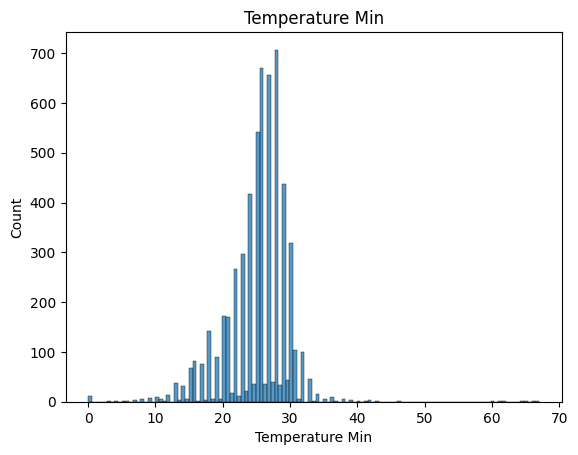

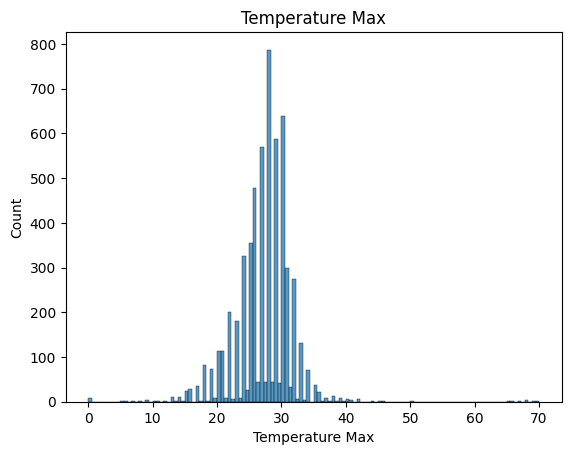

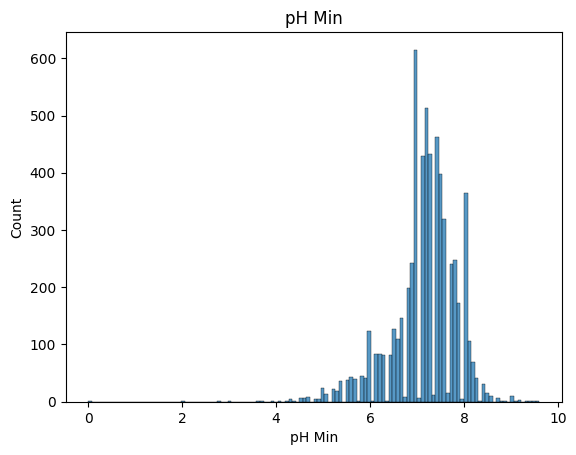

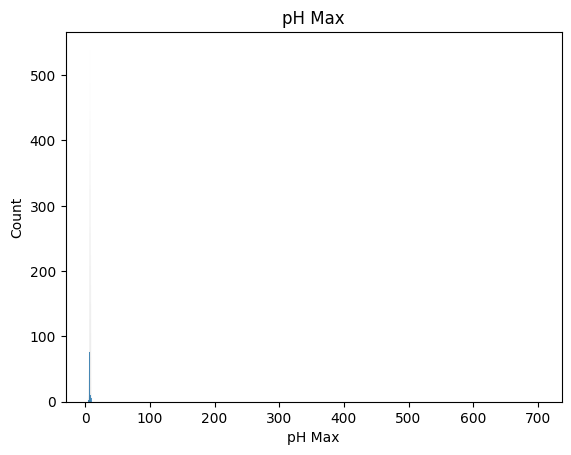

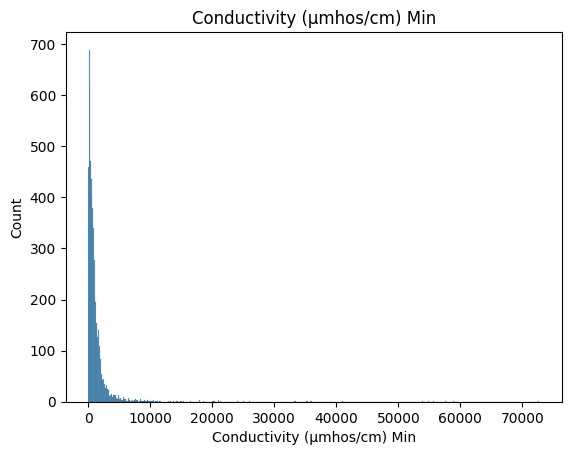

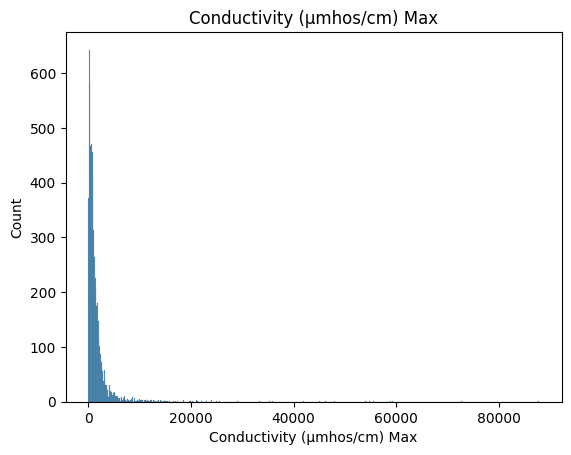

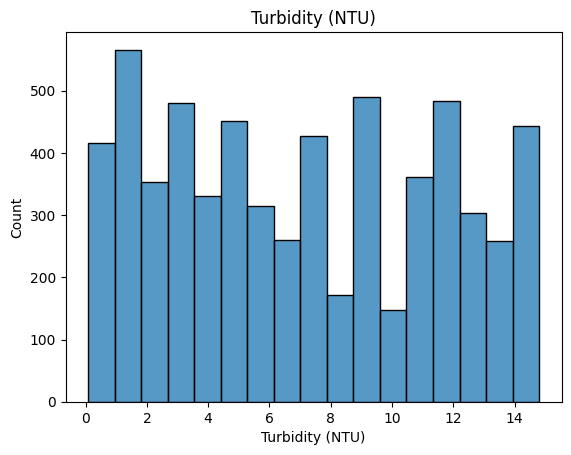

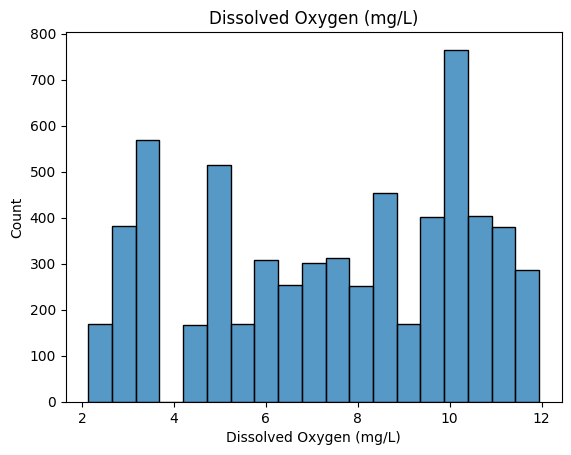

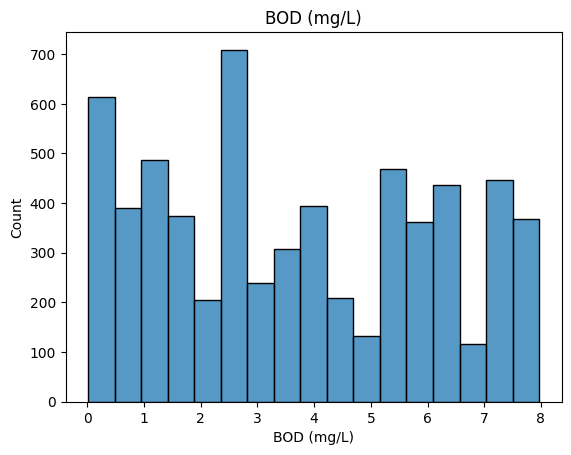

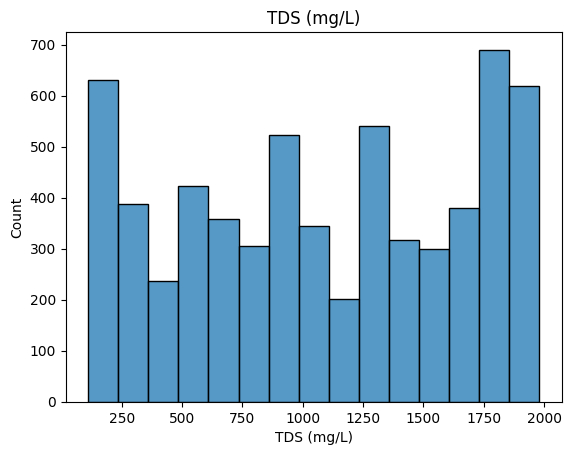

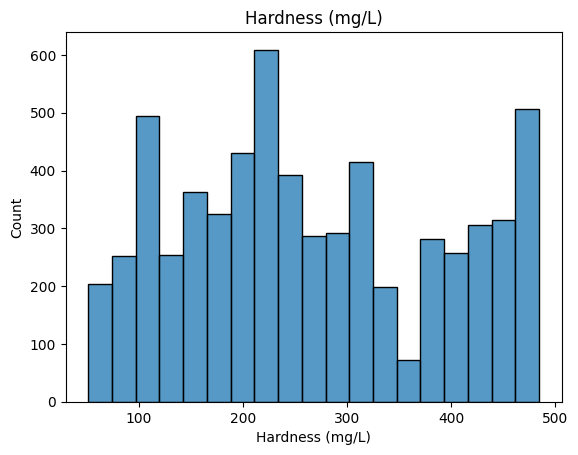

In [495]:
#histograms to understand the distribution
for i in selected_data.columns:
  sns.histplot(data=Dataset,x=i)
  plt.title(i)
  plt.show()


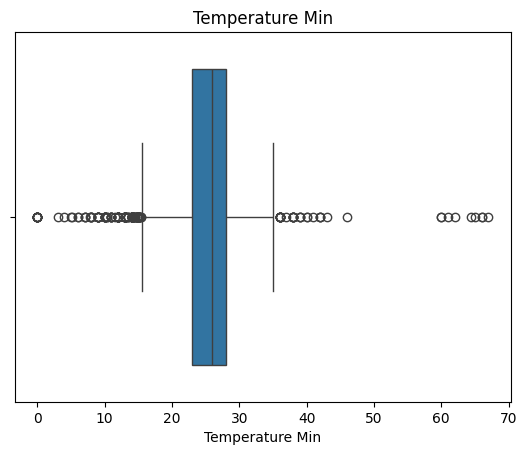

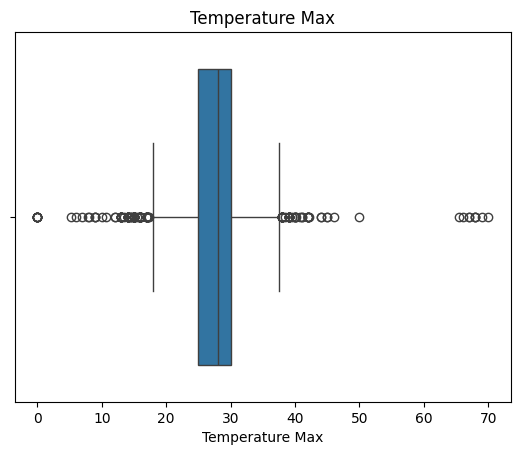

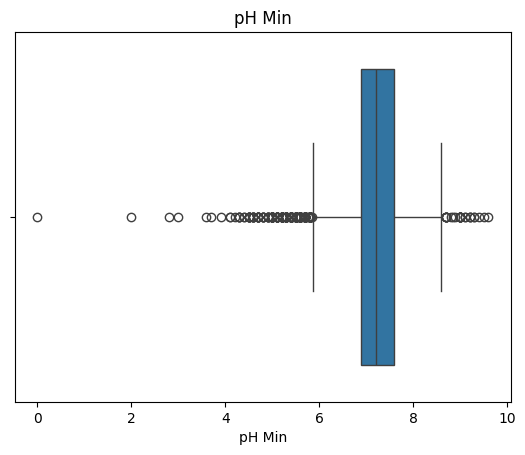

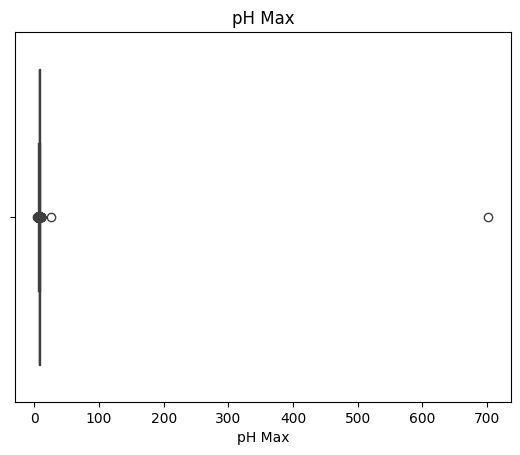

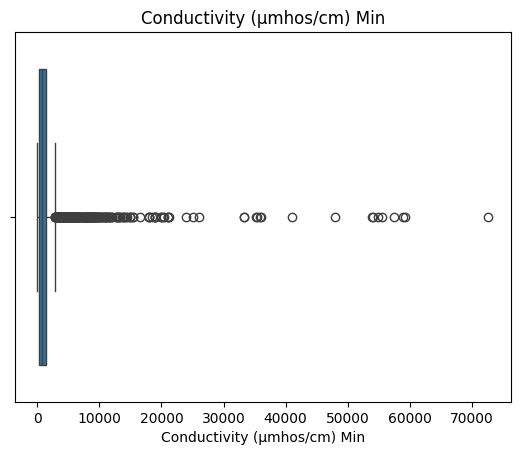

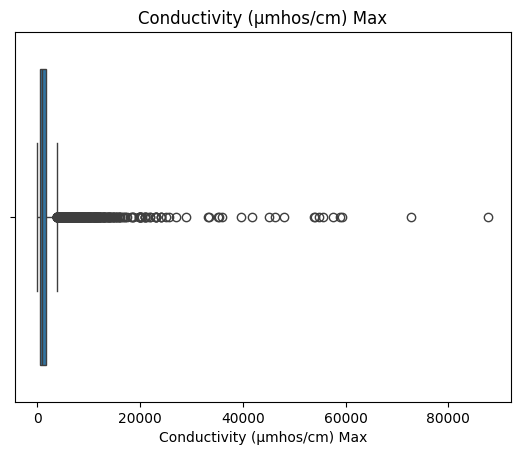

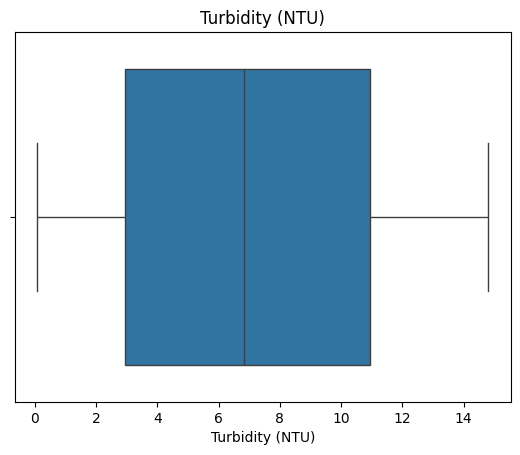

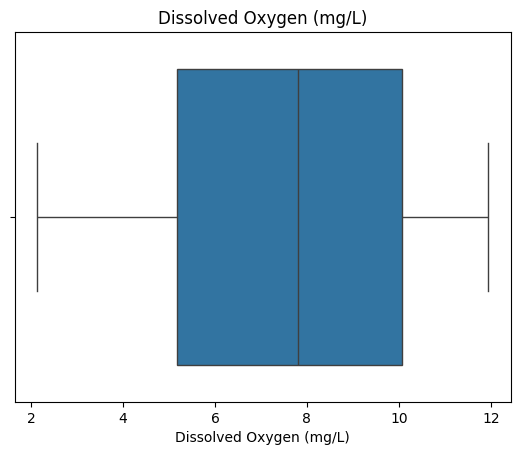

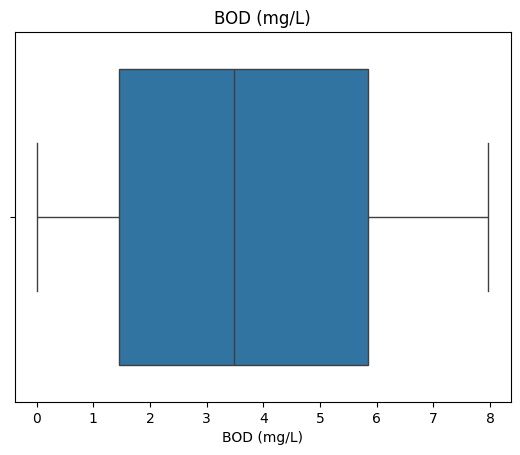

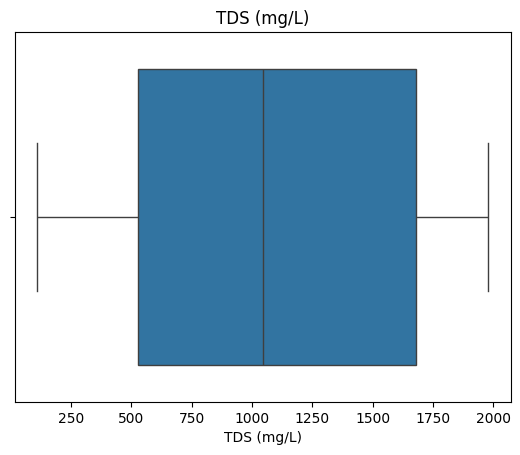

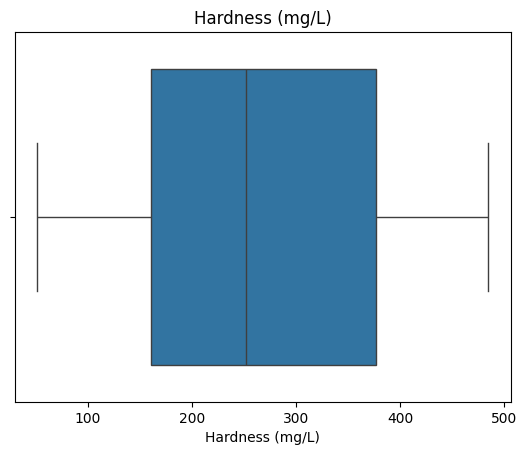

In [496]:
#Boxplot to identify Outliers
for i in selected_data.columns:
  sns.boxplot(data=Dataset,x=i)
  plt.title(i)
  plt.show()

In [497]:
#correlation with heatmap to interpret the relation and multicolliniarity
corr =selected_data.corr()
corr

,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L)
Temperature Min,1.000000,0.830448,0.123377,0.013942,0.089000,0.073487,0.009061,0.009368,-0.000166,-0.003191,0.011672
Temperature Max,0.830448,1.000000,0.081674,0.015695,0.065954,0.072768,-0.012094,0.019866,-0.010335,0.006327,-0.003233
pH Min,0.123377,0.081674,1.000000,0.070006,0.159941,0.163665,0.007405,0.000337,-0.010276,-0.017512,-0.001897
pH Max,0.013942,0.015695,0.070006,1.000000,0.013070,0.014312,0.002247,-0.019785,0.013073,-0.002856,0.000642
Conductivity (µmhos/cm) Min,0.089000,0.065954,0.159941,0.013070,1.000000,0.909731,-0.003163,0.027068,-0.015542,-0.014877,-0.009364
Conductivity (µmhos/cm) Max,0.073487,0.072768,0.163665,0.014312,0.909731,1.000000,0.001569,0.029100,-0.012572,-0.015586,-0.009966
Turbidity (NTU),0.009061,-0.012094,0.007405,0.002247,-0.003163,0.001569,1.000000,0.009649,-0.004839,0.009203,0.016756
Dissolved Oxygen (mg/L),0.009368,0.019866,0.000337,-0.019785,0.027068,0.029100,0.009649,1.000000,-0.006262,-0.000074,0.024323
BOD (mg/L),-0.000166,-0.010335,-0.010276,0.013073,-0.015542,-0.012572,-0.004839,-0.006262,1.000000,0.011733,0.000750
TDS (mg/L),-0.003191,0.006327,-0.017512,-0.002856,-0.014877,-0.015586,0.009203,-0.000074,0.011733,1.000000,-0.004154


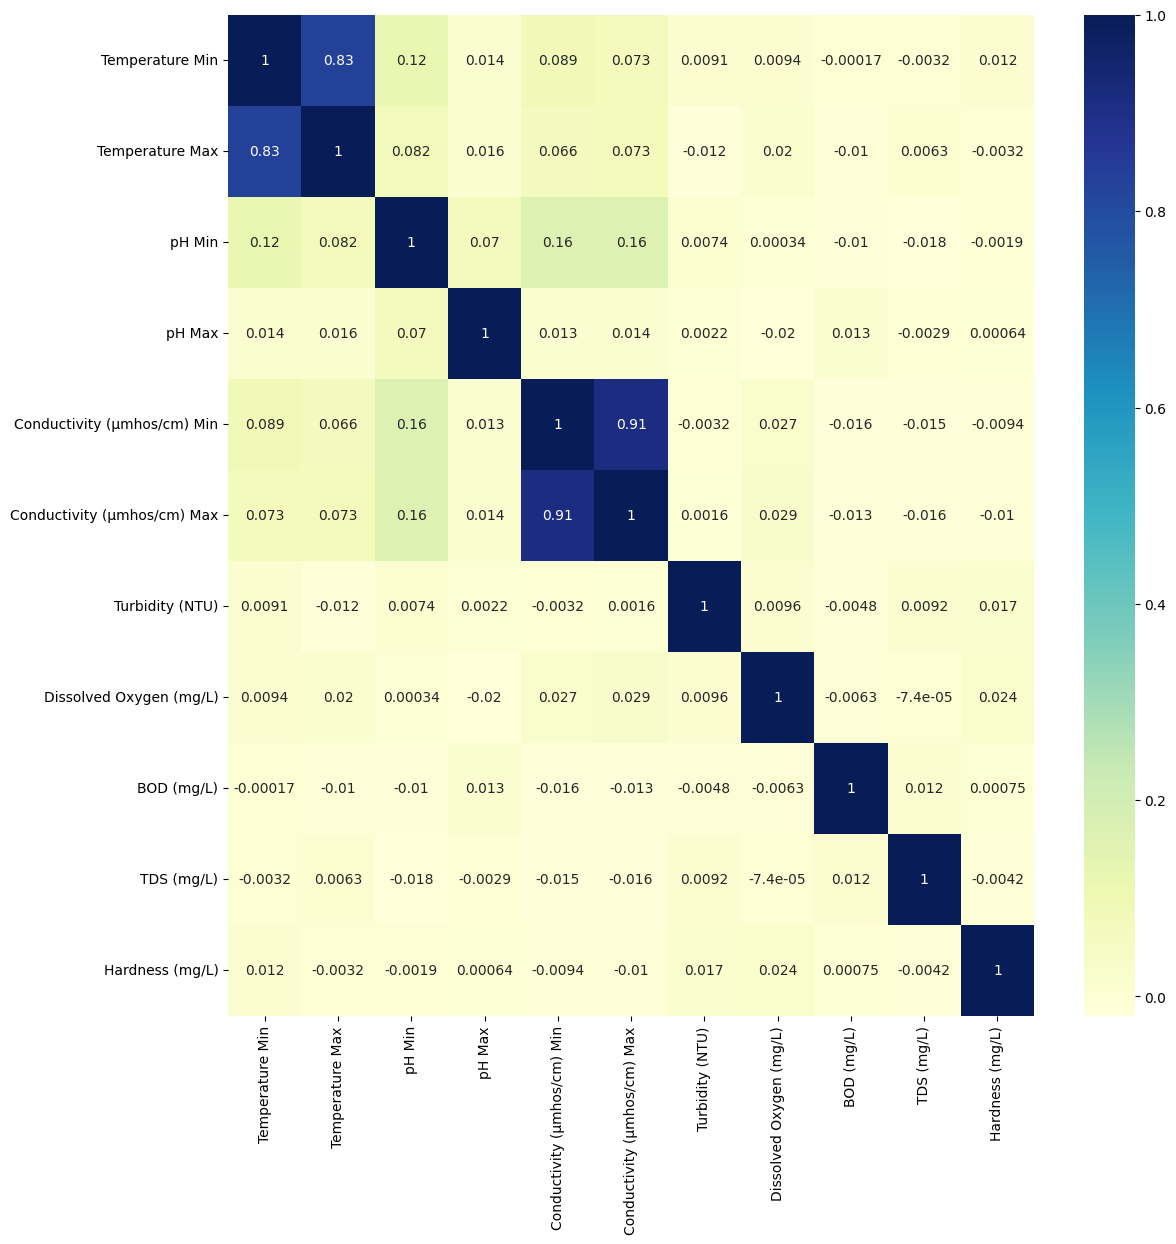

In [498]:
plt.figure(figsize=(13,13))
sns.heatmap(corr, annot=True, cmap="YlGnBu") # Change 'YlGnBu' to your desired colormap
plt.show()

##MISSING VALUE TREATMENT

In [499]:
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,498
Temperature Max,498
pH Min,121
pH Max,121
Conductivity (µmhos/cm) Min,192
Conductivity (µmhos/cm) Max,192


In [500]:
columns_to_impute = ['Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)', 'TDS (mg/L)', 'Hardness (mg/L)']

# Apply median imputation for each column
for column in columns_to_impute:
    median_value = Dataset[column].median()
    Dataset[column]=Dataset[column].fillna(median_value)

In [501]:
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,498
Temperature Max,498
pH Min,121
pH Max,121
Conductivity (µmhos/cm) Min,192
Conductivity (µmhos/cm) Max,192


In [502]:
import pandas as pd
from sklearn.impute import KNNImputer

knn_impute = ['Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
                     'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max']

# Create a KNNImputer instance (using k=5 as a common choice)
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation only to the specified columns
Dataset[knn_impute] = imputer.fit_transform(Dataset[knn_impute])


In [503]:
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,0
Temperature Max,0
pH Min,0
pH Max,0
Conductivity (µmhos/cm) Min,0
Conductivity (µmhos/cm) Max,0


In [504]:
Dataset = Dataset.dropna(subset=['Station Code'])
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,0
Station Name,0
STATE,0
Temperature Min,0
Temperature Max,0
pH Min,0
pH Max,0
Conductivity (µmhos/cm) Min,0
Conductivity (µmhos/cm) Max,0


In [505]:
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L)
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,7.811954,5.193830,230.164378,234.763384
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982


##Handling Outliers

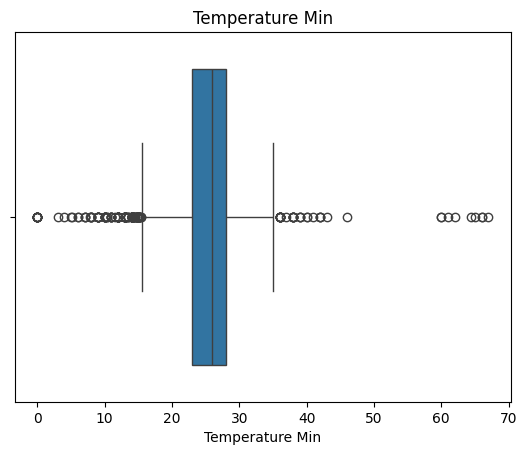

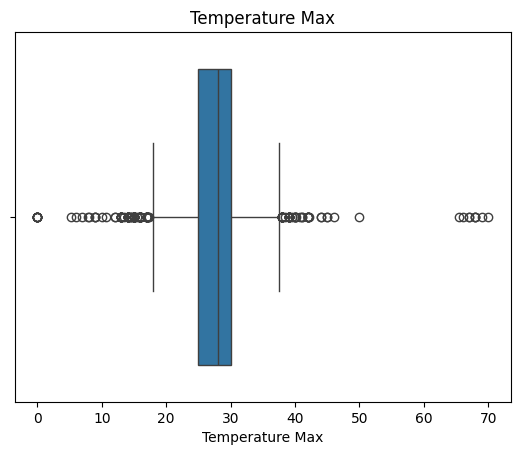

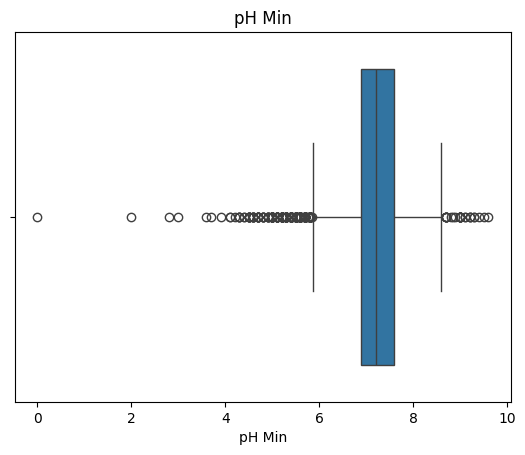

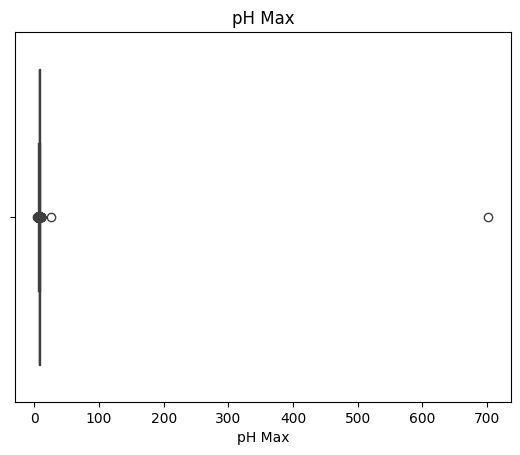

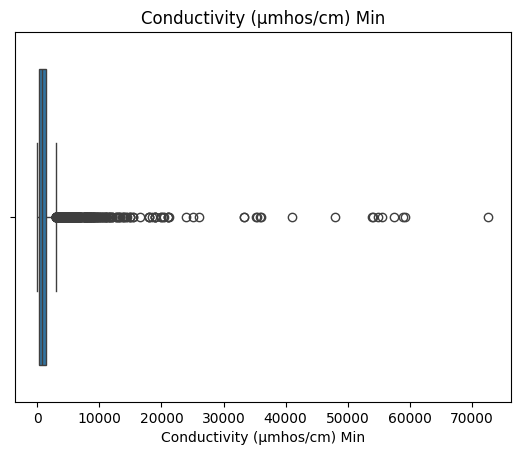

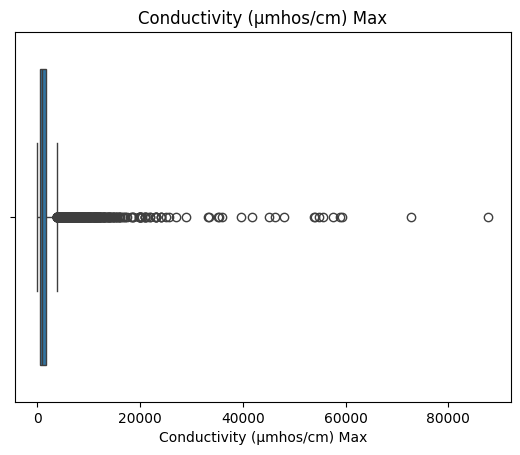

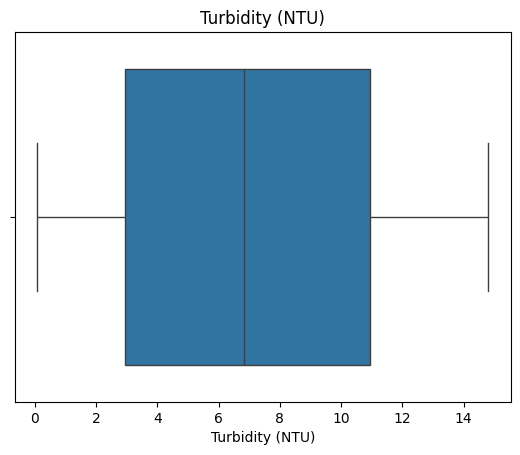

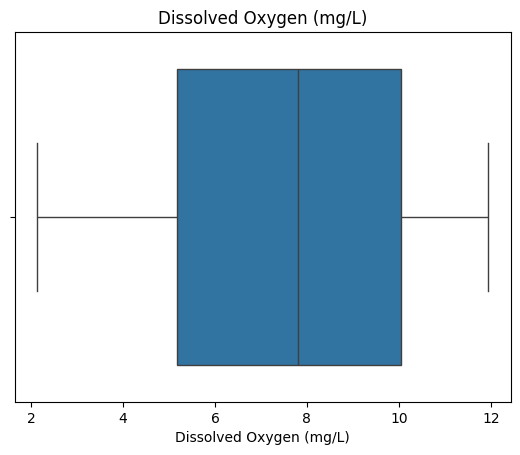

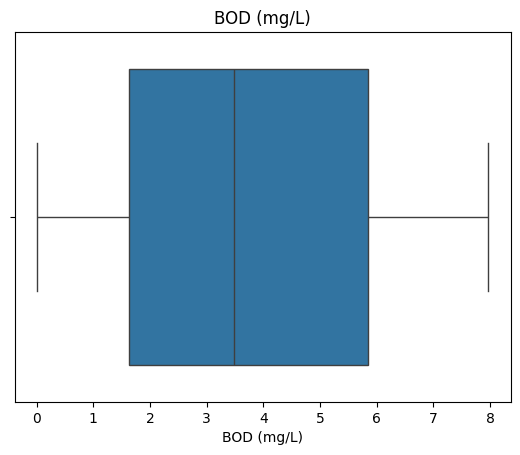

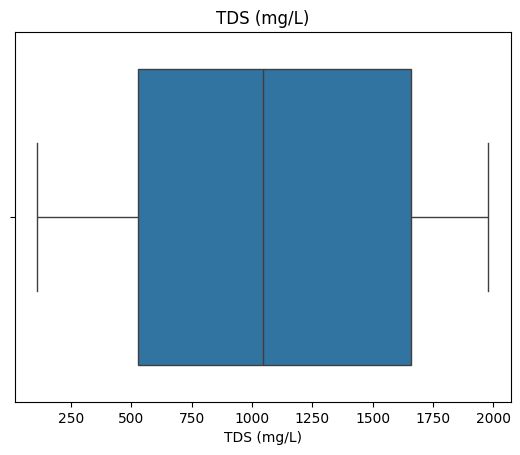

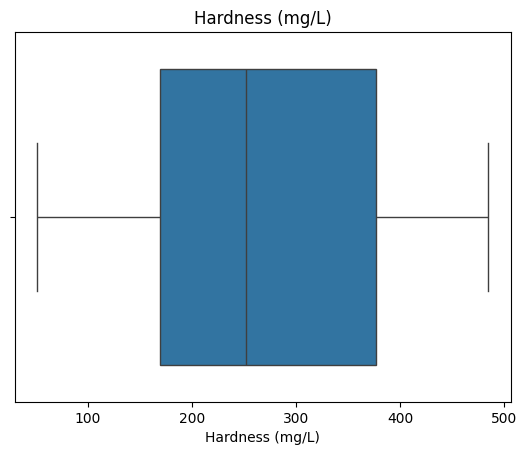

In [506]:
for i in selected_data.columns:
  sns.boxplot(data=Dataset,x=i)
  plt.title(i)
  plt.show()

In [507]:
def wisker(col):
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  lower_bound = q1 - (1.5*iqr)
  upper_bound = q3 + (1.5*iqr)
  return lower_bound,upper_bound

In [508]:
Dataset.columns

Index(['Unnamed: 0', 'Station Code', 'Station Name', 'STATE',
       'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max', 'Year',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)'],
      dtype='object')

In [509]:


for i in ['Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
          'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max']:
    lower_bound, upper_bound = wisker(Dataset[i])

    # Use .loc to limit values to within the whisker range
    Dataset.loc[Dataset[i] > upper_bound, i] = upper_bound
    Dataset.loc[Dataset[i] < lower_bound, i] = lower_bound


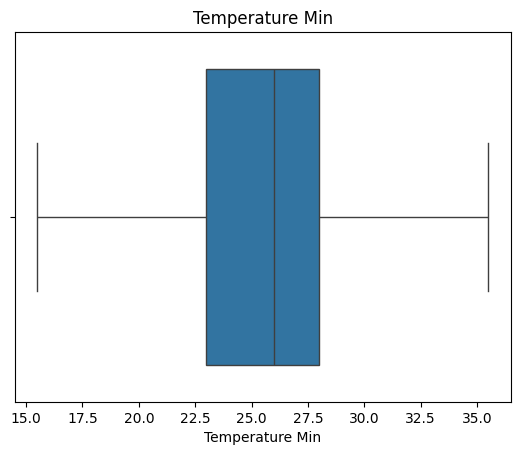

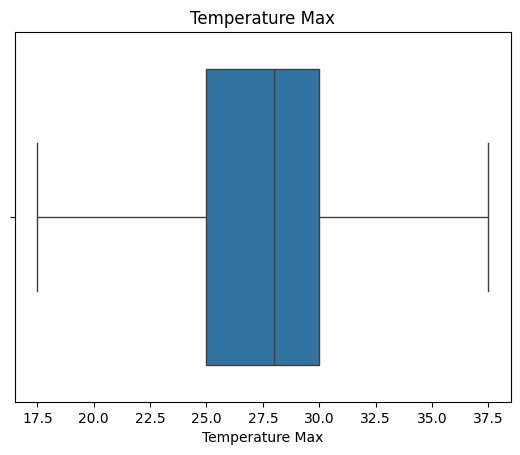

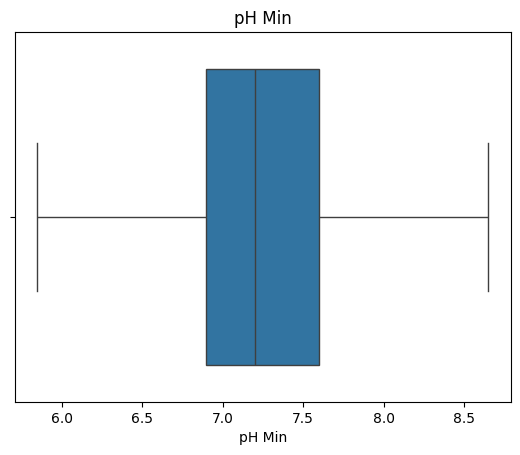

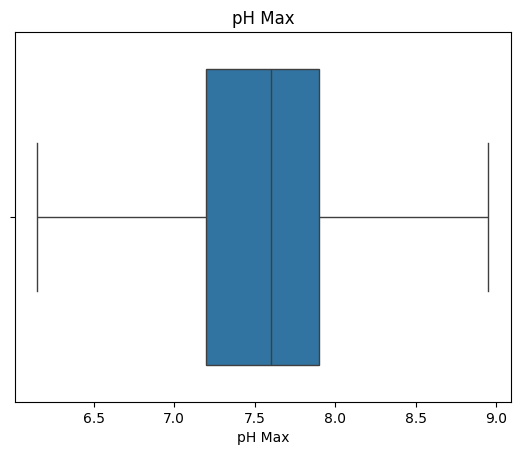

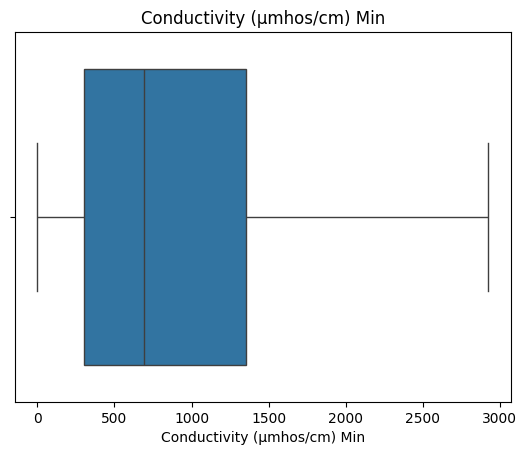

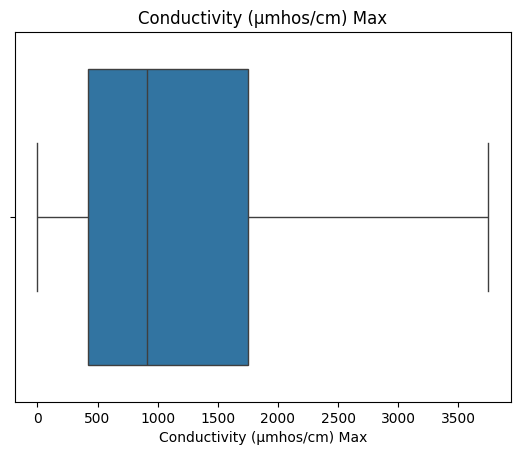

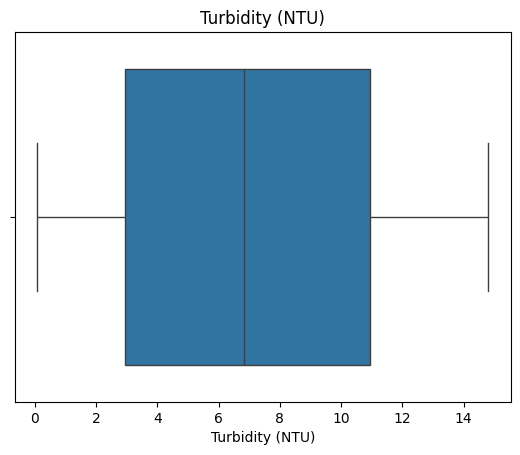

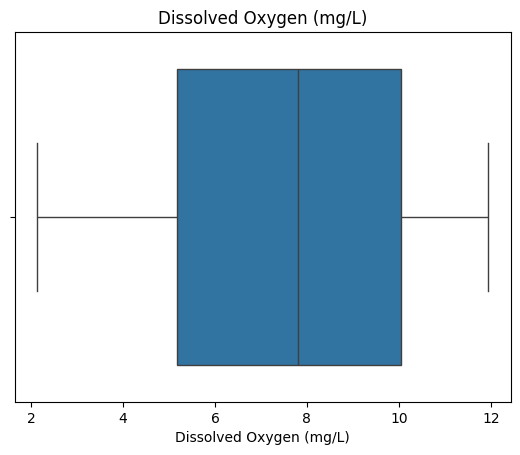

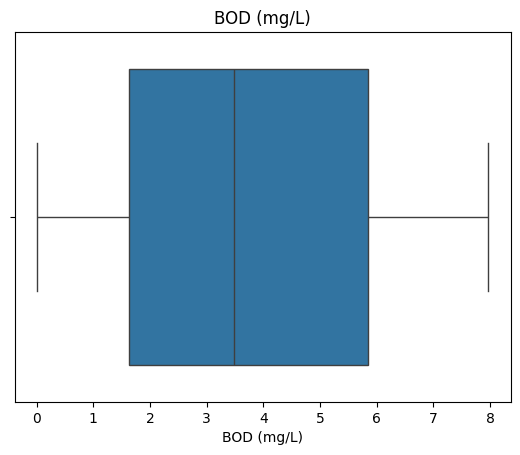

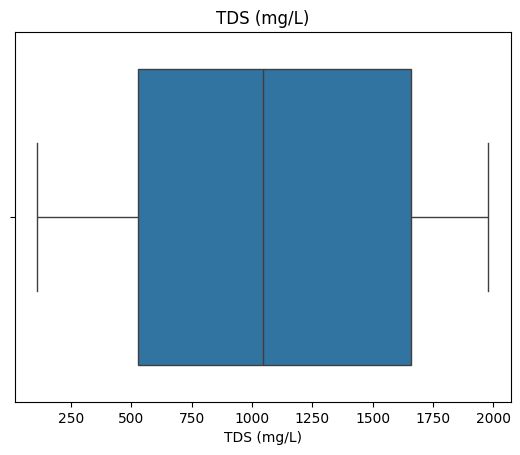

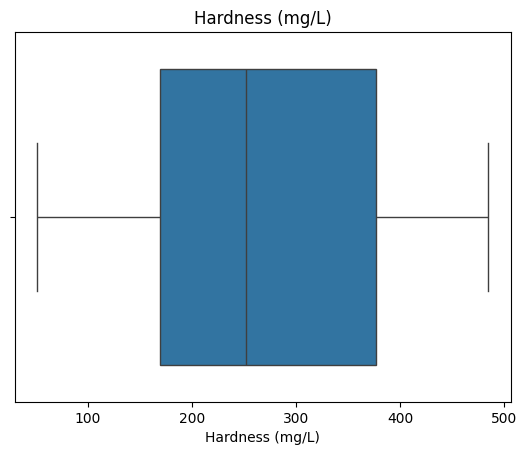

In [510]:
for i in selected_data.columns:
  sns.boxplot(data=Dataset,x=i)
  plt.title(i)
  plt.show()

##Added columns like Temperature Mean,pH Mean and Conductivity Mean

In [511]:
Dataset = Dataset.assign(
       pH_Mean=(Dataset['pH Min'] + Dataset['pH Max']) / 2,
       Conductivity_Mean=(Dataset['Conductivity (µmhos/cm) Min'] + Dataset['Conductivity (µmhos/cm) Max']) / 2,
       Temperature_Mean=(Dataset['Temperature Min'] + Dataset['Temperature Max']) / 2
   )


In [512]:
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),pH_Mean,Conductivity_Mean,Temperature_Mean
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680,7.335,210.5,25.5
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813,7.465,892.0,27.5
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732,7.290,1631.0,29.0
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474,8.310,1544.0,26.5
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151,6.955,1514.5,27.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138,7.550,504.5,28.5
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,7.811954,5.193830,230.164378,234.763384,7.350,1582.5,29.5
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151,7.300,1813.0,30.0
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982,7.400,999.5,28.0


In [513]:
Dataset.columns

Index(['Unnamed: 0', 'Station Code', 'Station Name', 'STATE',
       'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max', 'Year',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)', 'pH_Mean', 'Conductivity_Mean',
       'Temperature_Mean'],
      dtype='object')

In [514]:
#ITEMP (Water Temperature Index):
def calculate_ITEMP(temp):
    if temp <= 20:
        return 1
    else:
        return max(0, 1 - 0.01 * (temp - 20))  # Preventing negative values


#IBOD (Biological Oxygen Demand Index):
def calculate_IBOD(bod):
    if bod == 0:
        return 30
    elif bod > 12:
        return 0
    else:
        return max(0, 30 - (bod * 2.5))  # Example linear decrease


#ITSS (Total Suspended Solids Index):
def calculate_ITSS(tss):
    if tss == 0:
        return 25
    elif tss > 250:
        return 0
    else:
        return max(0, 25 - (tss / 10))  # Example linear decrease


#IDO (Dissolved Oxygen Index):
def calculate_IDO(do):
    if do > 10:
        return 25
    elif do == 0:
        return 0
    else:
        return max(0, 2.5 * do)  # Example linear increase


#ICOND (Conductivity Index):
def calculate_ICOND(conductivity):
    if conductivity <= 200:
        return 20
    elif conductivity >= 4000:
        return 0
    else:
        return max(0, 20 - ((conductivity - 200) / 190))  # Linear decrease


#Compute isqa
def calculate_ISQA(temp, bod, tss, do, conductivity):
    ITEMP = calculate_ITEMP(temp)
    IBOD = calculate_IBOD(bod)
    ITSS = calculate_ITSS(tss)
    IDO = calculate_IDO(do)
    ICOND = calculate_ICOND(conductivity)

    # Calculate the ISQA
    ISQA = ITEMP * (IBOD + ITSS + IDO + ICOND)
    return ISQA


#Classify Water Quality
def classify_quality(isqa):
    if isqa >= 80:
        return "Excellent"
    elif isqa >= 50:
        return "Good"
    elif isqa >= 30:
        return "Moderate"
    elif isqa >= 10:
        return "Poor"
    else:
        return "Very Poor"


# Assuming df is your DataFrame with 'temp', 'bod', 'tss', 'do', and 'conductivity' columns
Dataset['ISQA'] = Dataset.apply(lambda row: calculate_ISQA(row['Temperature_Mean'], row['BOD (mg/L)'], row['TDS (mg/L)'], row['Dissolved Oxygen (mg/L)'], row['Conductivity_Mean']), axis=1)
Dataset['Quality'] = Dataset['ISQA'].apply(classify_quality)


In [515]:
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,...,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),pH_Mean,Conductivity_Mean,Temperature_Mean,ISQA,Quality
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,...,4.070235,10.134345,0.962008,578.810775,104.950680,7.335,210.5,25.5,68.550033,Good
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,...,11.564508,10.595564,7.927889,529.066337,205.746813,7.465,892.0,27.5,47.672808,Moderate
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,...,14.543769,10.297229,1.070086,920.225147,217.964732,7.290,1631.0,29.0,58.961819,Good
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,...,11.564508,10.297229,6.486625,1198.784496,182.125474,8.310,1544.0,26.5,48.348620,Moderate
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,...,10.979909,3.262711,6.434438,1043.741646,123.066151,6.955,1514.5,27.5,32.515843,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,...,7.840992,8.334117,6.326797,723.104180,472.638138,7.550,504.5,28.5,48.875337,Moderate
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,...,4.675666,7.811954,5.193830,230.164378,234.763384,7.350,1582.5,29.5,46.383564,Moderate
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,...,6.479175,5.978842,6.091671,920.225147,123.066151,7.300,1813.0,30.0,37.105609,Moderate
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,...,1.465082,8.737017,6.525324,480.030896,373.339982,7.400,999.5,28.0,47.215631,Moderate


In [516]:
# # prompt: download updated csv after changes made above

# # Assuming the code you provided is in a file named 'water_quality.ipynb'
# # and you've already executed it in your Colab environment.

# # Download the updated DataFrame as a CSV file
# from google.colab import files
# Dataset.to_csv('updated_water_quality.csv', index=False)
# files.download('updated_water_quality.csv')

In [517]:
# prompt: print quality count

print(Dataset['Quality'].value_counts())


Quality
Good         3498
Moderate     2618
Poor          114
Excellent      10
Name: count, dtype: int64


CREATE POTABILITY COLUMN ACC to CPCB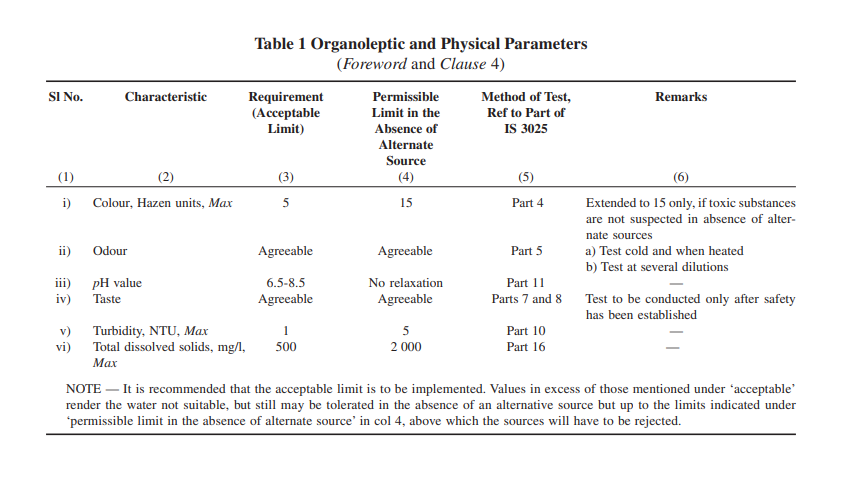

In [518]:
# prompt: add a column Potabilty such that the ph_Mean is between 6.5 and 8.5 Turbidity (NTU) less than or equal to 1 and TDS (mg/L) <=500 store it in dataset itself

# Create 'Potability' column based on conditions
Dataset['Potability'] = 0  # Initialize with 0 (non-potable)
Dataset.loc[((Dataset['pH_Mean'] >= 6.5) & (Dataset['pH_Mean'] <= 8.5)) &
            (Dataset['Turbidity (NTU)'] <= 1) &
            (Dataset['TDS (mg/L)'] <= 500), 'Potability'] = 1

Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,...,Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),pH_Mean,Conductivity_Mean,Temperature_Mean,ISQA,Quality,Potability
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,...,10.134345,0.962008,578.810775,104.950680,7.335,210.5,25.5,68.550033,Good,0
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,...,10.595564,7.927889,529.066337,205.746813,7.465,892.0,27.5,47.672808,Moderate,0
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,...,10.297229,1.070086,920.225147,217.964732,7.290,1631.0,29.0,58.961819,Good,0
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,...,10.297229,6.486625,1198.784496,182.125474,8.310,1544.0,26.5,48.348620,Moderate,0
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,...,3.262711,6.434438,1043.741646,123.066151,6.955,1514.5,27.5,32.515843,Moderate,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,...,8.334117,6.326797,723.104180,472.638138,7.550,504.5,28.5,48.875337,Moderate,0
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,...,7.811954,5.193830,230.164378,234.763384,7.350,1582.5,29.5,46.383564,Moderate,0
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,...,5.978842,6.091671,920.225147,123.066151,7.300,1813.0,30.0,37.105609,Moderate,0
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,...,8.737017,6.525324,480.030896,373.339982,7.400,999.5,28.0,47.215631,Moderate,0


In [519]:
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,0
Station Name,0
STATE,0
Temperature Min,0
Temperature Max,0
pH Min,0
pH Max,0
Conductivity (µmhos/cm) Min,0
Conductivity (µmhos/cm) Max,0


In [520]:
# prompt: show different values of potability column

print(Dataset['Potability'].unique())

[0 1]


In [521]:
# prompt: count number of 1 in Potability

# Count the number of 1s in the 'Potability' column
count_of_1 = Dataset['Potability'].value_counts().get(1, 0)

print(f"Number of 1s in 'Potability' column: {count_of_1}")

Number of 1s in 'Potability' column: 92


In [522]:
Dataset.columns


Index(['Unnamed: 0', 'Station Code', 'Station Name', 'STATE',
       'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max', 'Year',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)', 'pH_Mean', 'Conductivity_Mean',
       'Temperature_Mean', 'ISQA', 'Quality', 'Potability'],
      dtype='object')

Create water quality column

In [523]:
# prompt: upsample minority of potability

# Assuming 'Dataset' DataFrame from the previous code is available.

from imblearn.over_sampling import RandomOverSampler

# Separate features (X) and target variable (y)
X = Dataset.drop('Potability', axis=1)
y = Dataset['Potability']

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)  # You can change the random state

# Resample the dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
Dataset = pd.DataFrame(X_resampled, columns=X.columns)
Dataset['Potability'] = y_resampled

# Print the value counts of the 'Potability' column to verify the upsampling
print(Dataset['Potability'].value_counts())

# Now 'upsampled_dataset' contains the upsampled data
# You can further use this dataset for model training etc.

Potability
0    6148
1    6148
Name: count, dtype: int64


In [524]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler



# Define a function to label the data according to the water quality standards
def classify_water(row):
    if 6.5 <= row['pH_Mean'] <= 8.5 and row['Dissolved Oxygen (mg/L)'] >= 6 and row['BOD (mg/L)'] <= 2 :
        return 'A'
    elif 6.5 <= row['pH_Mean'] <= 8.5 and row['Dissolved Oxygen (mg/L)'] >= 5 and row['BOD (mg/L)'] <= 3 :
        return 'B'
    elif 6 <= row['pH_Mean'] <= 9 and row['Dissolved Oxygen (mg/L)'] >= 4 and row['BOD (mg/L)'] <= 3 :
        return 'C'
    elif 6.5 <= row['pH_Mean'] <= 8.5 and row['Dissolved Oxygen (mg/L)'] >= 4:
        return 'D'
    elif 6.0 <= row['pH_Mean'] <= 8.5 and row['Conductivity_Mean'] <= 2250:
        return 'E'
    else:
        return 'Below-E'

# Apply the classification function to create a label column
Dataset['Water_Quality_Category'] = Dataset.apply(classify_water, axis=1)



In [525]:
# prompt: show values count in Water_Quality_Category

# Count the occurrences of each category in 'Water_Quality_Category'
water_quality_counts = Dataset['Water_Quality_Category'].value_counts()

# Print the counts
water_quality_counts

,count
Water_Quality_Category,
D,5209
A,2423
E,2193
B,1718
C,520
Below-E,233


In [526]:


#If you want to describe the 'Water_Quality_Category' column:
Dataset['ISQA'].describe()


,ISQA
count,12296.000000
mean,52.128781
std,10.950667
min,18.225684
25%,45.288032
50%,52.310439
75%,59.891328
max,85.314156


#DATA VISUALIZATION


# Assuming your data is loaded into a DataFrame called 'df'
# Replace this with your actual data loading code
# df = pd.read_csv('your_dataset.csv')

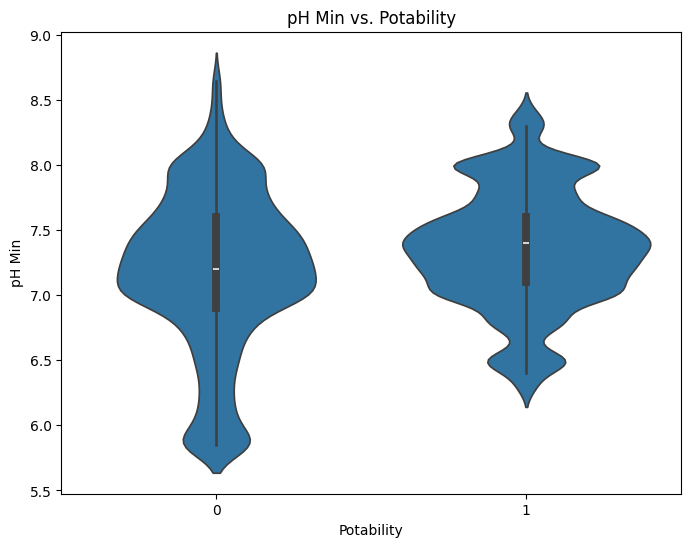

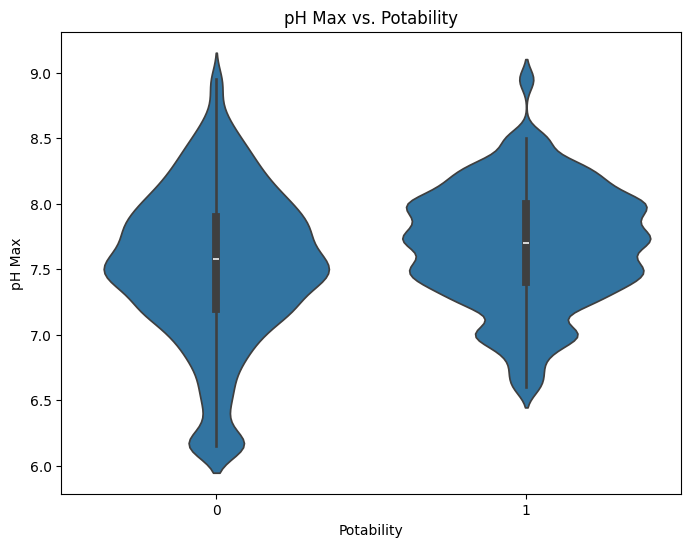

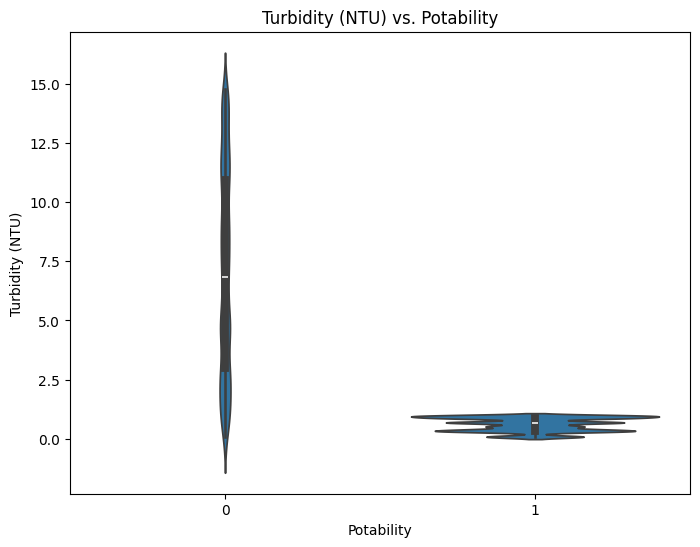

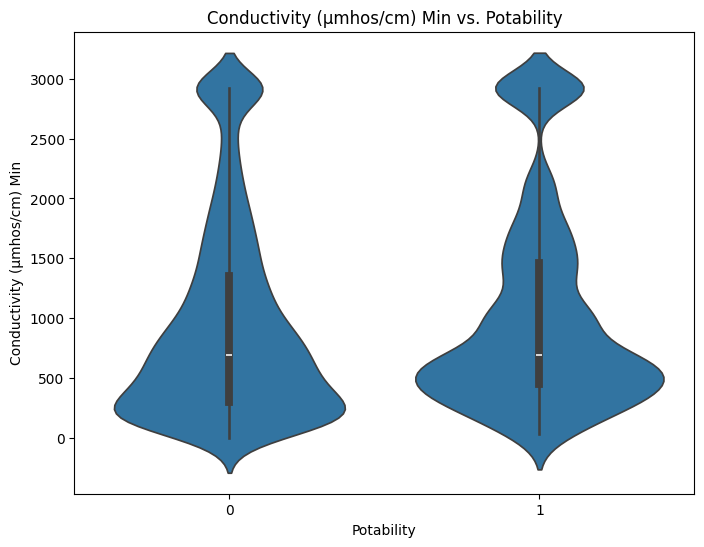

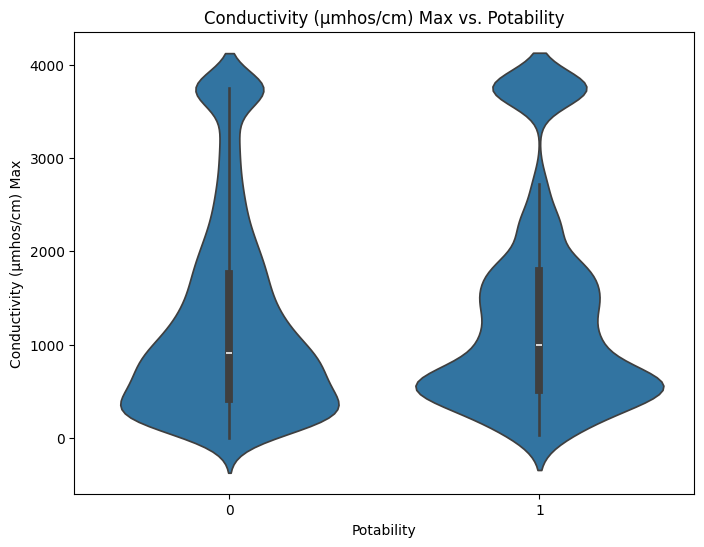

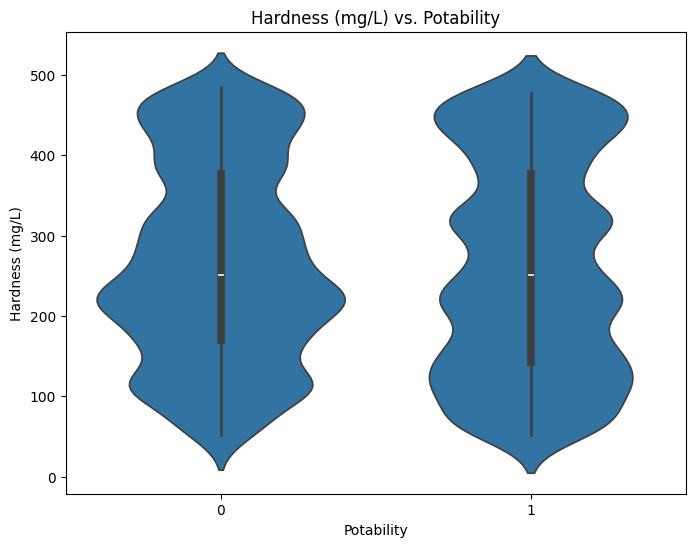

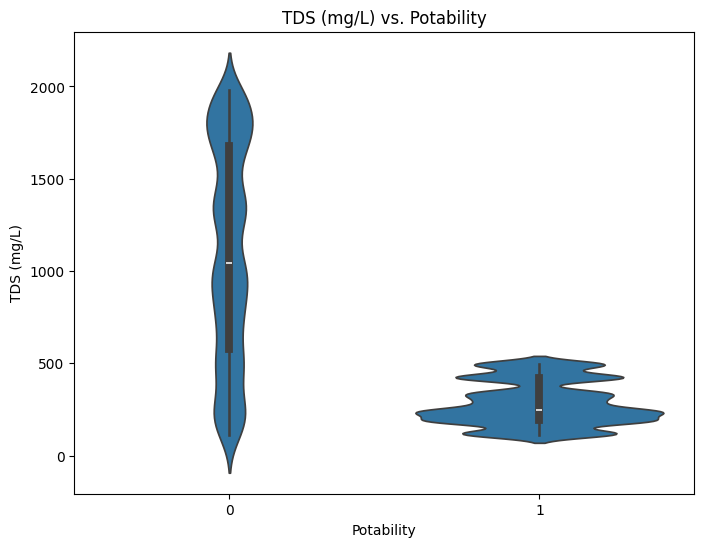

In [527]:
# prompt: give a best plotting technique which compares each attribute to potability other than histplot and boxplot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Dataset' and 'selected_data' are defined as in the previous code.

# Create a list of attributes to compare with potability
attributes = ['pH Min', 'pH Max', 'Turbidity (NTU)', 'Conductivity (µmhos/cm) Min',
              'Conductivity (µmhos/cm) Max', 'Hardness (mg/L)', 'TDS (mg/L)']

# Plotting using violinplots
for attribute in attributes:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.violinplot(x='Potability', y=attribute, data=Dataset)
    plt.title(f'{attribute} vs. Potability')
    plt.xlabel('Potability')
    plt.ylabel(attribute)
    plt.show()

<Figure size 1200x600 with 0 Axes>

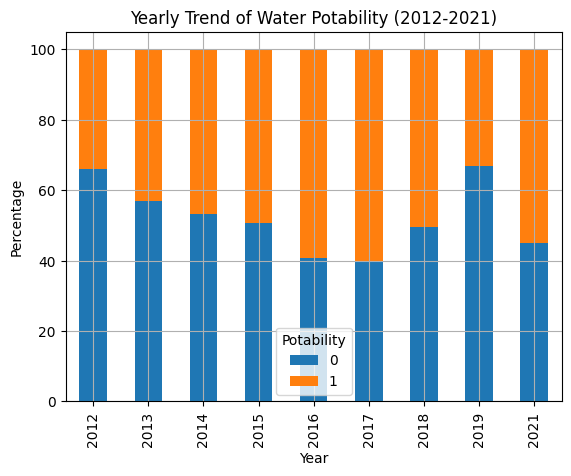

In [528]:




    # 1. Yearly Trend of Water Potability
    plt.figure(figsize=(12, 6))
    yearly_potability = Dataset.groupby(['Year', 'Potability']).size().unstack()
    yearly_potability_pct = yearly_potability.div(yearly_potability.sum(axis=1), axis=0) * 100
    yearly_potability_pct.plot(kind='bar', stacked=True)
    plt.title('Yearly Trend of Water Potability (2012-2021)')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend(title='Potability')
    plt.grid(True)
    plt.show()




**Year-wise Quality Trend:**


1.Reveals long-term trends in water quality
2.Shows effectiveness of water management policies
3.Identifies periods of quality improvement or deterioration
4.Helps in future water quality predictions





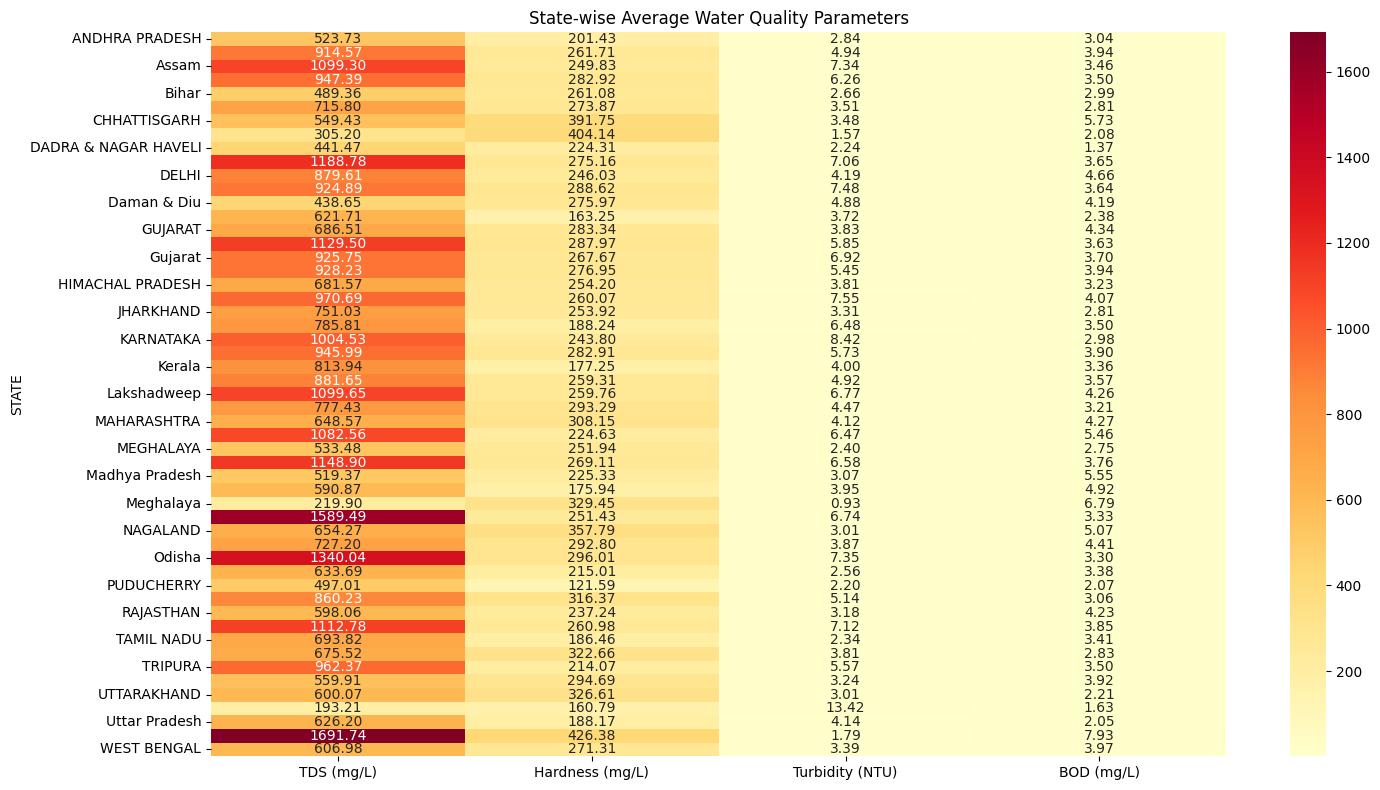

In [529]:
 # 2. State-wise Water Quality Heatmap
plt.figure(figsize=(15, 8)) # Removed extra indentation here
state_params = Dataset.groupby('STATE')[['TDS (mg/L)', 'Hardness (mg/L)', 'Turbidity (NTU)', 'BOD (mg/L)']].mean()
sns.heatmap(state_params, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('State-wise Average Water Quality Parameters')
plt.tight_layout()
plt.show()


***State-wise Quality Comparison:***


1.Compares overall water quality across states
2.Identifies states needing immediate intervention
3.Shows regional patterns in water quality
4.Useful for resource allocation

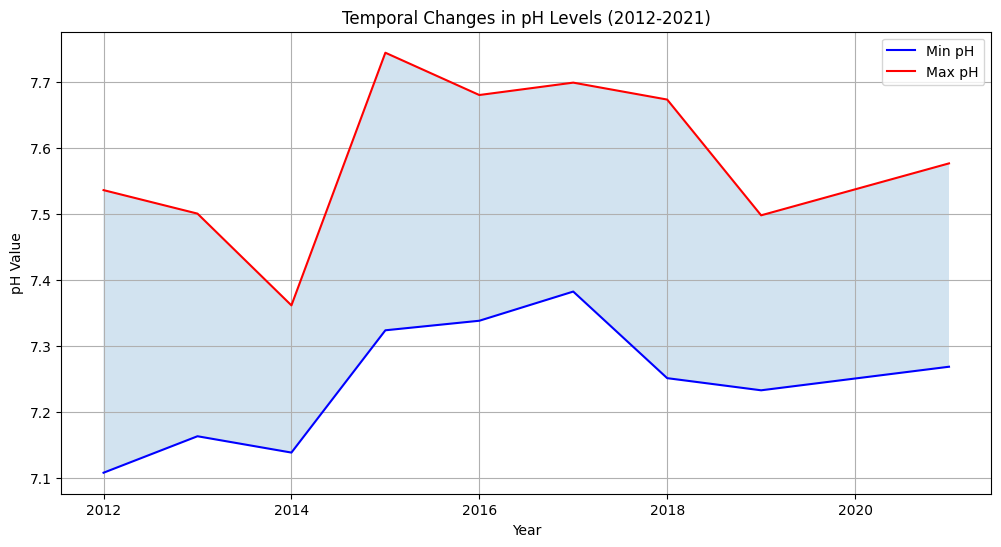

In [530]:
    # 3. Temporal Changes in pH Levels
    plt.figure(figsize=(12, 6))
    yearly_ph = Dataset.groupby('Year')[['pH Min', 'pH Max']].mean()
    plt.plot(yearly_ph.index, yearly_ph['pH Min'], 'b-', label='Min pH')
    plt.plot(yearly_ph.index, yearly_ph['pH Max'], 'r-', label='Max pH')
    plt.fill_between(yearly_ph.index, yearly_ph['pH Min'], yearly_ph['pH Max'], alpha=0.2)
    plt.title('Temporal Changes in pH Levels (2012-2021)')
    plt.xlabel('Year')
    plt.ylabel('pH Value')
    plt.legend()
    plt.grid(True)
    plt.show()

***pH Range Analysis:***


1.Shows state-wise variations in pH levels
2.Identifies states with concerning pH ranges
3.Helps in targeted pH treatment planning
4.Useful for ecological impact assessment

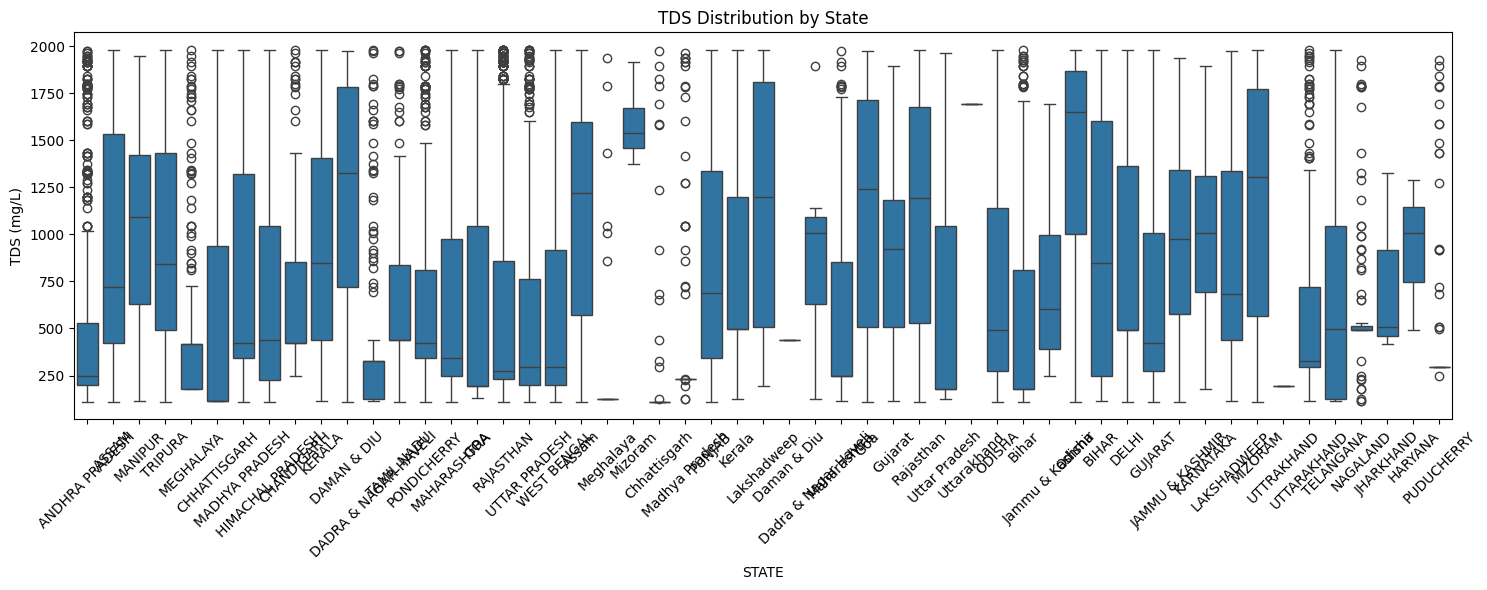

In [531]:
    # 4. Box Plot of TDS Distribution by State
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='STATE', y='TDS (mg/L)', data=Dataset)
    plt.xticks(rotation=45)
    plt.title('TDS Distribution by State')
    plt.tight_layout()
    plt.show()


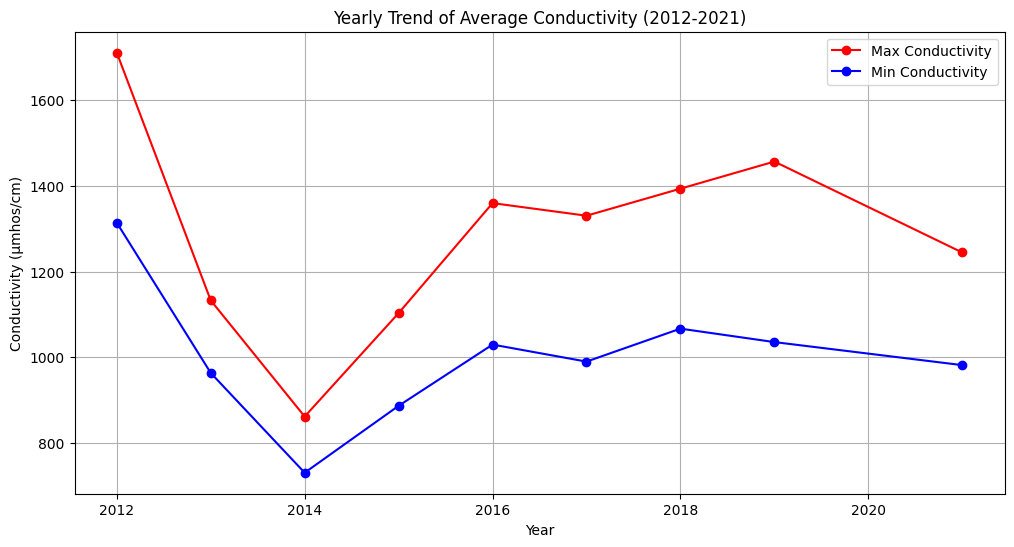

In [532]:
    # 5. Yearly Trend of Average Conductivity
    plt.figure(figsize=(12, 6))
    yearly_conductivity = Dataset.groupby('Year')[['Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max']].mean()
    plt.plot(yearly_conductivity.index, yearly_conductivity['Conductivity (µmhos/cm) Max'],
             'ro-', label='Max Conductivity')
    plt.plot(yearly_conductivity.index, yearly_conductivity['Conductivity (µmhos/cm) Min'],
             'bo-', label='Min Conductivity')
    plt.title('Yearly Trend of Average Conductivity (2012-2021)')
    plt.xlabel('Year')
    plt.ylabel('Conductivity (μmhos/cm)')
    plt.legend()
    plt.grid(True)
    plt.show()

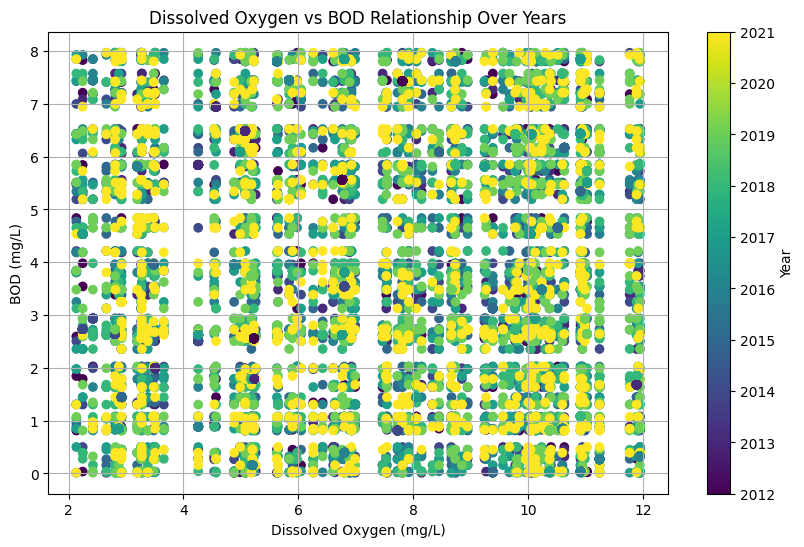

In [533]:
    # 6. Dissolved Oxygen vs BOD Scatter Plot with Year Color Coding
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(Dataset['Dissolved Oxygen (mg/L)'], Dataset['BOD (mg/L)'],
                         c=Dataset['Year'], cmap='viridis')
    plt.colorbar(scatter, label='Year')
    plt.xlabel('Dissolved Oxygen (mg/L)')
    plt.ylabel('BOD (mg/L)')
    plt.title('Dissolved Oxygen vs BOD Relationship Over Years')
    plt.grid(True)
    plt.show()

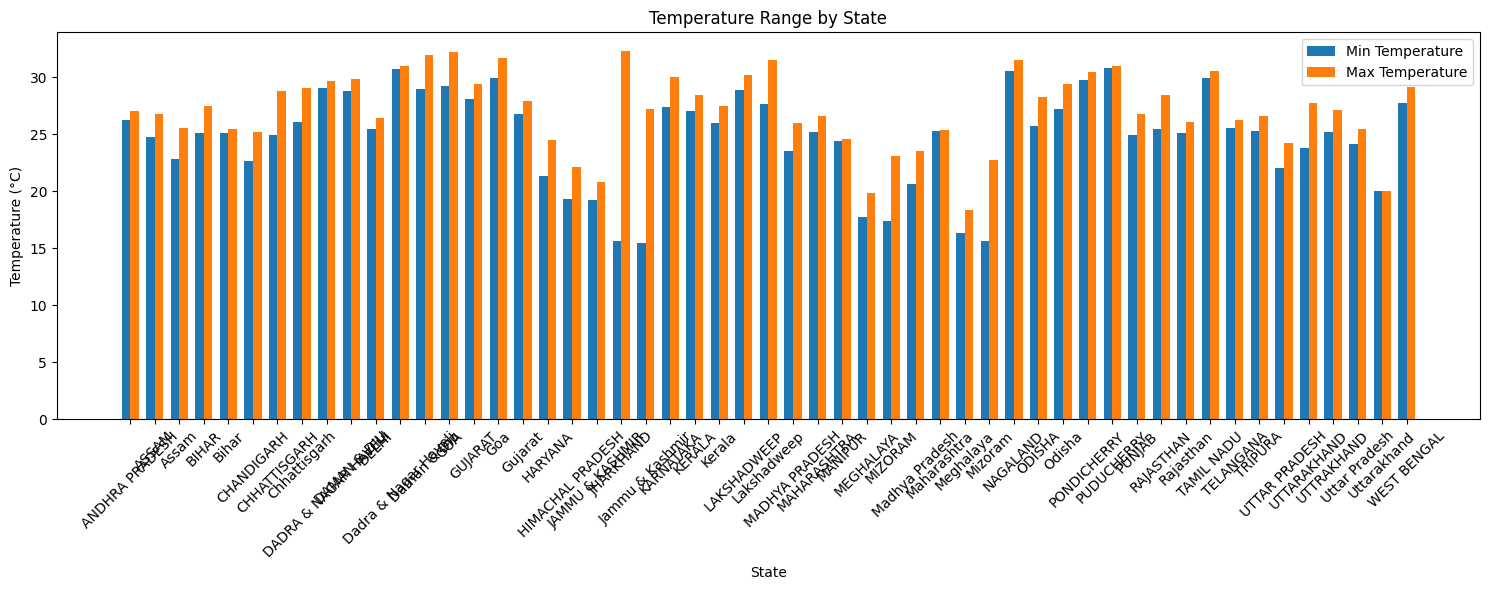

In [534]:
    # 7. Temperature Range by State and Season
    plt.figure(figsize=(15, 6))
    state_temp = Dataset.groupby('STATE')[['Temperature Min', 'Temperature Max']].mean()
    x = np.arange(len(state_temp.index))
    width = 0.35
    plt.bar(x - width/2, state_temp['Temperature Min'], width, label='Min Temperature')
    plt.bar(x + width/2, state_temp['Temperature Max'], width, label='Max Temperature')
    plt.xlabel('State')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Range by State')
    plt.xticks(x, state_temp.index, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

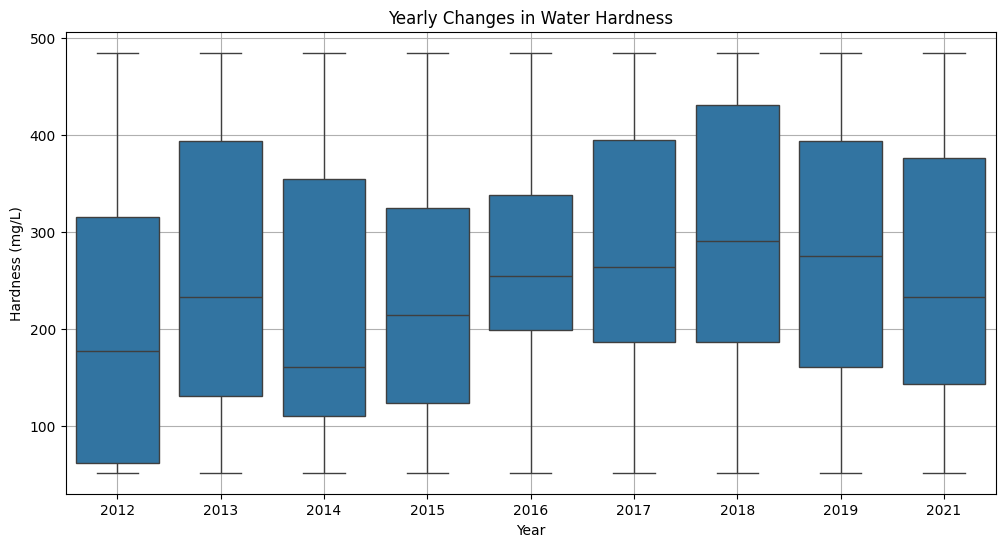

In [535]:
    # 8. Yearly Changes in Water Hardness
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Year', y='Hardness (mg/L)', data=Dataset)
    plt.title('Yearly Changes in Water Hardness')
    plt.xlabel('Year')
    plt.ylabel('Hardness (mg/L)')
    plt.grid(True)
    plt.show()

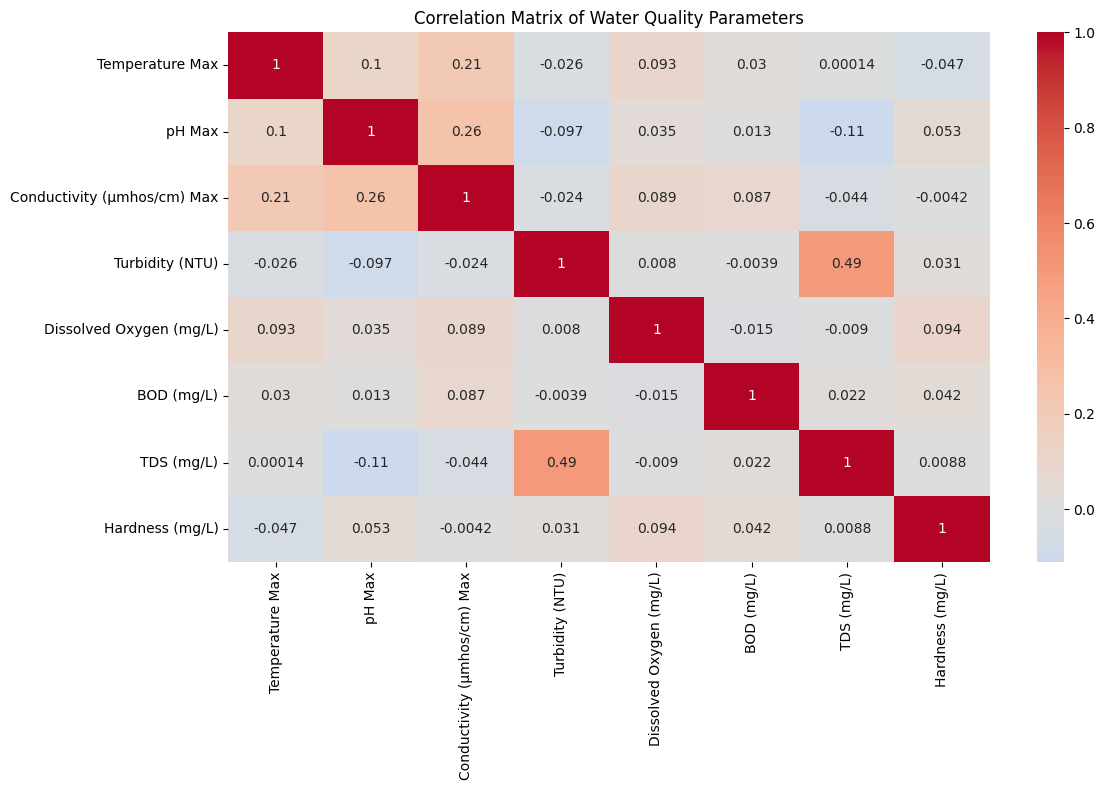

In [536]:
# 9. Correlation Matrix Over Time
plt.figure(figsize=(12, 8))
numeric_cols = ['Temperature Max', 'pH Max', 'Conductivity (µmhos/cm) Max',
               'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)', 'TDS (mg/L)', 'Hardness (mg/L)']
# Replacing 'df' with 'Dataset' to access the DataFrame containing the data
correlation = Dataset[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Water Quality Parameters')
plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

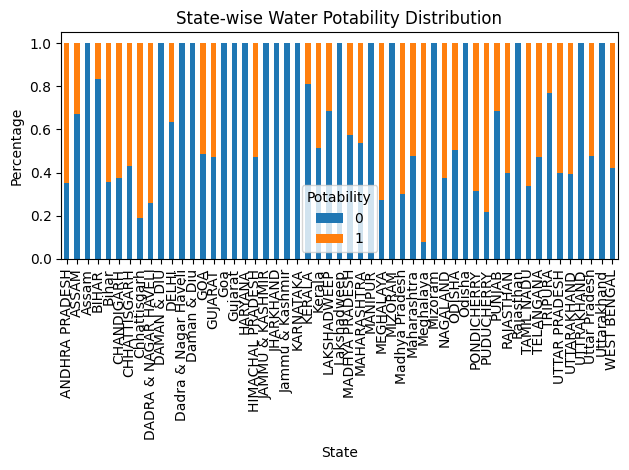

In [537]:
    # 10. State-wise Potability Analysis
    plt.figure(figsize=(15, 6))
    state_potability = Dataset.groupby('STATE')['Potability'].value_counts(normalize=True).unstack()
    state_potability.plot(kind='bar', stacked=True)
    plt.title('State-wise Water Potability Distribution')
    plt.xlabel('State')
    plt.ylabel('Percentage')
    plt.legend(title='Potability')
    plt.tight_layout()
    plt.show()

In [538]:
Dataset.columns

Index(['Unnamed: 0', 'Station Code', 'Station Name', 'STATE',
       'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max', 'Year',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)', 'pH_Mean', 'Conductivity_Mean',
       'Temperature_Mean', 'ISQA', 'Quality', 'Potability',
       'Water_Quality_Category'],
      dtype='object')

#Encoding Potability

In [539]:
# Dataset['Potability'] = Dataset['Potability'].map({'Drinkable': 1, 'Not Drinkable': 0})
# Dataset

#ENCODING

#One-hot encode the 'State' column

In [540]:
Dataset['STATE'] = Dataset['STATE'].str.replace('Uttrakhand', 'Uttarakhand', case=False)

In [541]:
Dataset['STATE'] = Dataset['STATE'].str.title().str.strip()

In [542]:
# Dataset = pd.get_dummies(Dataset, columns=["STATE"], drop_first=True)
# Dataset

In [543]:
Dataset.columns

Index(['Unnamed: 0', 'Station Code', 'Station Name', 'STATE',
       'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max', 'Year',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)', 'pH_Mean', 'Conductivity_Mean',
       'Temperature_Mean', 'ISQA', 'Quality', 'Potability',
       'Water_Quality_Category'],
      dtype='object')

#Normalization

In [544]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization, excluding identifiers or binary flags
numerical_columns = [
    'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
    'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max',
    'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)', 'TDS (mg/L)', 'Hardness (mg/L)',
    'pH_Mean', 'Conductivity_Mean', 'Temperature_Mean'
]

# Initialize MinMaxScaler and normalize
scaler = MinMaxScaler()
Dataset[numerical_columns] = scaler.fit_transform(Dataset[numerical_columns])

# Confirm normalization by displaying the summary statistics
Dataset[numerical_columns].describe()


,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),pH_Mean,Conductivity_Mean,Temperature_Mean
count,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000,12296.000000
mean,0.493703,0.487915,0.506620,0.519684,0.340229,0.344741,0.257351,0.542863,0.465533,0.311159,0.487217,0.513152,0.342763,0.490809
std,0.196266,0.182996,0.194613,0.187199,0.286010,0.287137,0.305283,0.299381,0.300883,0.312898,0.297419,0.179458,0.279625,0.181421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.425000,0.375000,0.410714,0.410714,0.125385,0.132040,0.040459,0.299936,0.204070,0.063898,0.243606,0.410714,0.133318,0.400000
50%,0.525000,0.525000,0.517857,0.517857,0.237265,0.255410,0.060660,0.578524,0.435914,0.165672,0.461544,0.517857,0.252327,0.525000
75%,0.625000,0.620000,0.625000,0.660714,0.492735,0.472809,0.459103,0.815249,0.732796,0.499273,0.750499,0.642857,0.491169,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [545]:
# # prompt: download file after normalization

# from google.colab import files
# Dataset.to_csv('normalized_water_data.csv', index=False)
# files.download('normalized_water_data.csv')

In [546]:
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,0
Station Name,0
STATE,0
Temperature Min,0
Temperature Max,0
pH Min,0
pH Max,0
Conductivity (µmhos/cm) Min,0
Conductivity (µmhos/cm) Max,0


#For Category Prediction

In [547]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import numpy as np

# Drop unnecessary columns and encode target labels
data = Dataset.drop(columns=['Unnamed: 0', 'Station Code', 'Station Name', 'STATE', 'Year', 'Potability','ISQA','Quality'])
label_encoder = LabelEncoder()
data['Water_Quality_Category'] = label_encoder.fit_transform(data['Water_Quality_Category'])

# Separate features and target
X = data.drop(columns=['Water_Quality_Category'])
y = data['Water_Quality_Category']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define multiple models for comparison
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Initialize results dictionary to store classification reports
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Define a pipeline with scaling and model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        (model_name, model)
    ])

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predict on test data
    y_pred = pipeline.predict(X_test)

    # Store the classification report
    results[model_name] = classification_report(y_test, y_pred, target_names=label_encoder.classes_)




{'Logistic Regression': '              precision    recall  f1-score   support\n\n           A       0.87      0.93      0.90       456\n           B       0.77      0.69      0.73       355\n     Below-E       0.82      0.55      0.66        51\n           C       0.70      0.56      0.62       115\n           D       0.91      0.95      0.93      1041\n           E       0.78      0.78      0.78       442\n\n    accuracy                           0.85      2460\n   macro avg       0.81      0.74      0.77      2460\nweighted avg       0.85      0.85      0.85      2460\n',
 'Random Forest': '              precision    recall  f1-score   support\n\n           A       1.00      1.00      1.00       456\n           B       0.99      1.00      0.99       355\n     Below-E       1.00      0.98      0.99        51\n           C       0.99      0.97      0.98       115\n           D       1.00      1.00      1.00      1041\n           E       1.00      1.00      1.00       442\n\n    accura

In [548]:
# Display classification reports for each model
for model_name, report in results.items():
    print(f"Classification Report for {model_name}:\n")
    print(report)
    print("\n" + "="*50 + "\n")  # Separator for better readability between reports


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           A       0.87      0.93      0.90       456
           B       0.77      0.69      0.73       355
     Below-E       0.82      0.55      0.66        51
           C       0.70      0.56      0.62       115
           D       0.91      0.95      0.93      1041
           E       0.78      0.78      0.78       442

    accuracy                           0.85      2460
   macro avg       0.81      0.74      0.77      2460
weighted avg       0.85      0.85      0.85      2460



Classification Report for Random Forest:

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       456
           B       0.99      1.00      0.99       355
     Below-E       1.00      0.98      0.99        51
           C       0.99      0.97      0.98       115
           D       1.00      1.00      1.00      1041
           E       1.00      1.00      1

In [549]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Function to generate synthetic test data within the observed feature ranges
def generate_synthetic_data(df, num_samples=10):
    synthetic_data = pd.DataFrame()

    # Loop through each column and generate random values within the observed range
    for col in df.columns:
        min_val, max_val = df[col].min(), df[col].max()
        synthetic_data[col] = np.random.uniform(min_val, max_val, num_samples)

    # Shuffle the generated data for randomness
    return shuffle(synthetic_data).reset_index(drop=True)

# Generate 10 samples of synthetic testing data
synthetic_test_data = generate_synthetic_data(X, num_samples=10)

# Display the completed synthetic test data
synthetic_test_data


,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),pH_Mean,Conductivity_Mean,Temperature_Mean
0,0.215889,0.686537,0.895578,0.394459,0.432662,0.834545,0.033166,0.923088,0.767860,0.737801,0.886788,0.413923,0.974495,0.605956
1,0.645937,0.629781,0.236418,0.761533,0.911456,0.631518,0.683445,0.051778,0.096776,0.538244,0.951267,0.091516,0.917468,0.161471
2,0.846151,0.907740,0.827380,0.221533,0.354017,0.704474,0.905177,0.481269,0.817241,0.733678,0.169686,0.188933,0.089137,0.611375
3,0.673503,0.921230,0.608530,0.181189,0.915924,0.599064,0.515333,0.245336,0.027831,0.054718,0.225973,0.137931,0.552949,0.132916
4,0.933104,0.496237,0.987662,0.210358,0.305354,0.244569,0.320250,0.593263,0.890006,0.046220,0.188612,0.999578,0.319603,0.131727
5,0.417583,0.493735,0.802654,0.178540,0.571413,0.604301,0.525387,0.842307,0.189656,0.374472,0.942870,0.189848,0.246584,0.428738
6,0.895358,0.246145,0.793872,0.071502,0.585751,0.244863,0.109833,0.237318,0.472013,0.875029,0.637036,0.262433,0.831926,0.671611
7,0.615386,0.335230,0.348894,0.082599,0.451331,0.559249,0.979027,0.032065,0.734503,0.105706,0.631990,0.413453,0.941678,0.618077
8,0.013880,0.179845,0.922058,0.343244,0.410885,0.676636,0.722394,0.700956,0.221660,0.811545,0.794508,0.099609,0.523588,0.974461
9,0.631250,0.550190,0.929946,0.432296,0.058263,0.284368,0.386201,0.885019,0.867718,0.214153,0.765810,0.380707,0.406553,0.523539


In [550]:
# Initialize dictionary to store predictions for each model
synthetic_predictions = {}

# Test each trained model on synthetic test data
for model_name, model in models.items():
    # Define a pipeline with scaling and model for each trained model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        (model_name, model)
    ])

    # Fit the model pipeline with the training data
    pipeline.fit(X_train, y_train)

    # Predict on synthetic test data
    encoded_predictions = pipeline.predict(synthetic_test_data)

    # Decode the predictions to original categories
    decoded_predictions = label_encoder.inverse_transform(encoded_predictions)
    synthetic_predictions[model_name] = decoded_predictions

# Display predictions for each model in category form
for model_name, prediction in synthetic_predictions.items():
    print(f"Predictions for {model_name} in original categories:")
    print(prediction)


Predictions for Logistic Regression in original categories:
['D' 'E' 'D' 'C' 'D' 'A' 'E' 'E' 'B' 'D']
Predictions for Random Forest in original categories:
['D' 'Below-E' 'D' 'C' 'D' 'A' 'D' 'Below-E' 'A' 'D']
Predictions for SVC in original categories:
['D' 'Below-E' 'D' 'C' 'D' 'A' 'E' 'E' 'B' 'D']
Predictions for Gradient Boosting in original categories:
['D' 'Below-E' 'D' 'C' 'Below-E' 'A' 'D' 'Below-E' 'C' 'D']


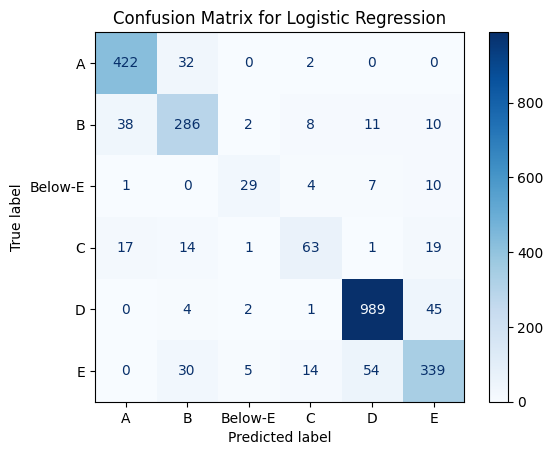

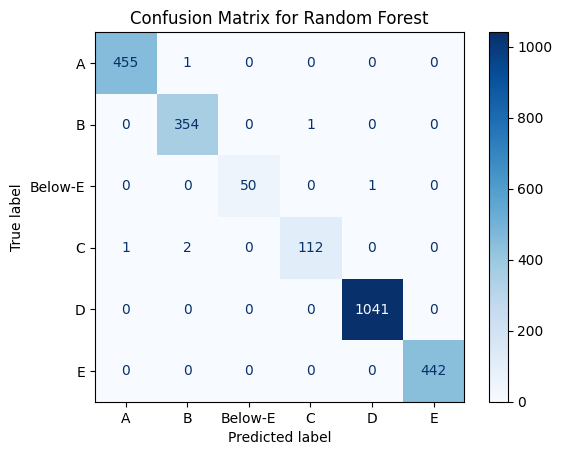

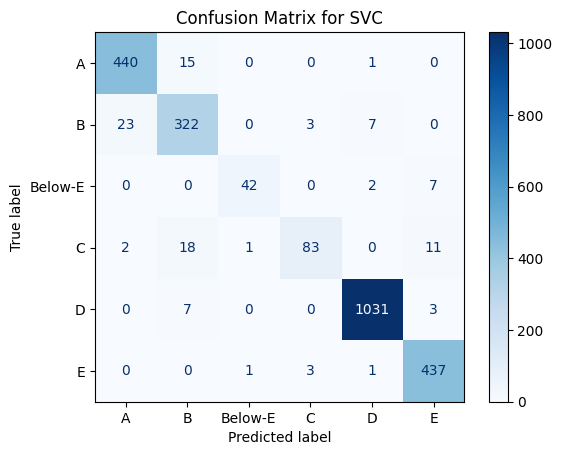

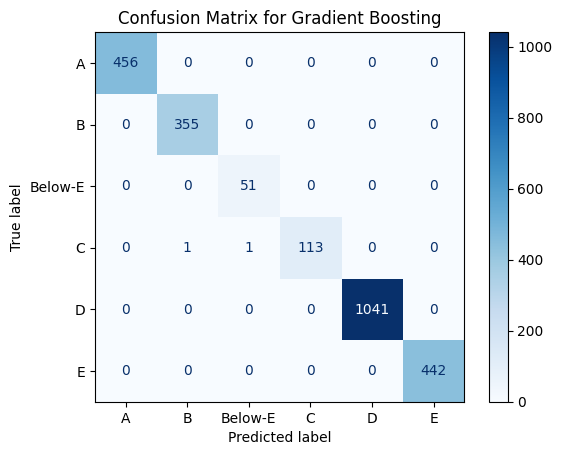

In [551]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to plot confusion matrix for each model
def plot_confusion_matrix(model_name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Plot confusion matrices for all models
for model_name, model in models.items():
    # Define a pipeline with scaling and model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (model_name, model)
    ])

    # Fit and predict
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Plot the confusion matrix
    plot_confusion_matrix(model_name, y_test, y_pred)


In [552]:
# prompt: generate random forest seperately

# Assuming X_train, X_test, y_train, y_test, and label_encoder are defined from the previous code.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a pipeline with MinMaxScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('random_forest', rf_classifier)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       456
           B       0.99      1.00      0.99       355
     Below-E       1.00      0.98      0.99        51
           C       0.99      0.97      0.98       115
           D       1.00      1.00      1.00      1041
           E       1.00      1.00      1.00       442

    accuracy                           1.00      2460
   macro avg       1.00      0.99      0.99      2460
weighted avg       1.00      1.00      1.00      2460



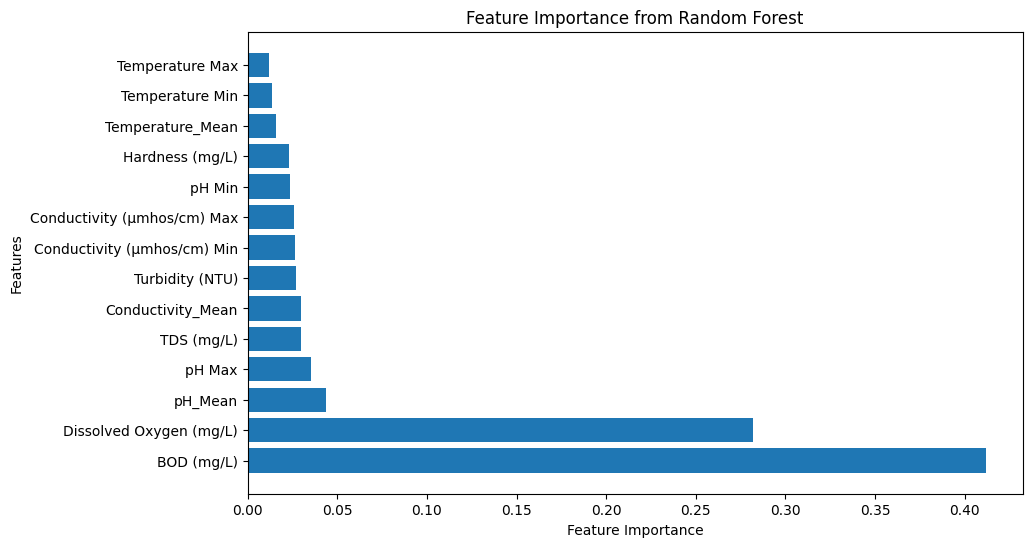

In [553]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Fit a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort features by importance
features = X_train.columns
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()


In [554]:
# prompt: reduce features to Dissolved Oxygen (mg/L) BOD(mg/L) pH_Mean and Conductivity_Mean and the apply random Forest

# Assuming 'Dataset' DataFrame is available from the previous code.

# Select relevant features
selected_features = ['Dissolved Oxygen (mg/L)', 'BOD (mg/L)', 'pH_Mean', 'Conductivity_Mean', 'Water_Quality_Category']
selected_data = Dataset[selected_features]

# Separate features (X) and target variable (y)
X = selected_data.drop('Water_Quality_Category', axis=1)
y = selected_data['Water_Quality_Category']

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       456
           B       0.99      1.00      1.00       355
     Below-E       1.00      1.00      1.00        51
           C       0.99      0.98      0.99       115
           D       1.00      1.00      1.00      1041
           E       1.00      1.00      1.00       442

    accuracy                           1.00      2460
   macro avg       1.00      1.00      1.00      2460
weighted avg       1.00      1.00      1.00      2460



In [555]:
# prompt: test above model by generating random values for selected_features

# Generate random values for selected features within their observed ranges
num_samples = 10  # Number of random samples to generate

random_selected_features = pd.DataFrame()
for feature in ['Dissolved Oxygen (mg/L)', 'BOD (mg/L)', 'pH_Mean', 'Conductivity_Mean']:
    min_val = X[feature].min()
    max_val = X[feature].max()
    random_selected_features[feature] = np.random.uniform(min_val, max_val, num_samples)

# Now you have random values for selected features in 'random_selected_features'
print(random_selected_features)

# Use the trained model to predict water quality categories for this random data
predicted_categories = rf_classifier.predict(random_selected_features)
# Inverse transform the encoded predictions back to the original category labels
predicted_categories_decoded = label_encoder.inverse_transform(predicted_categories)

predicted_categories_decoded

   Dissolved Oxygen (mg/L)  BOD (mg/L)   pH_Mean  Conductivity_Mean
0                 0.064373    0.385079  0.111283           0.002522
1                 0.060371    0.039057  0.205045           0.408522
2                 0.938588    0.188000  0.658390           0.808826
3                 0.452617    0.444937  0.437062           0.708647
4                 0.858236    0.654907  0.535398           0.395325
5                 0.463027    0.237378  0.482703           0.122147
6                 0.164778    0.978539  0.372003           0.100406
7                 0.394940    0.529602  0.428570           0.180225
8                 0.320471    0.287168  0.148543           0.604839
9                 0.429049    0.806478  0.779260           0.941967


array(['E', 'E', 'A', 'D', 'D', 'A', 'E', 'D', 'C', 'D'], dtype=object)

The Random Forest and Gradient Boosting classifiers both demonstrate exceptional performance, with perfect or near-perfect precision, recall, and f1-scores across all classes, resulting in an accuracy of 1.00. Here’s why these models are outperforming the others:

Random Forest:

High Accuracy: With an accuracy of 1.00, it perfectly classifies all instances in your dataset.
Resilient to Overfitting: Random Forest's structure, with multiple decision trees and averaging, reduces the likelihood of overfitting while maintaining high accuracy.
Feature Importance: This model inherently provides feature importance, which helps in understanding the most impactful features for water quality classification.

Gradient Boosting:

Excellent Precision and Recall: Gradient Boosting achieves precision, recall, and f1-scores of 1.00 for almost all classes, closely matching the Random Forest.
Adaptive Learning: It corrects errors by focusing more on misclassified samples through each iteration, enhancing performance and minimizing errors.
Better for Imbalanced Data: Gradient Boosting is particularly effective if you have any class imbalance, as it learns incrementally and gives more weight to difficult cases.

Logistic Regression and SVC Lagged:

Logistic Regression generally doesn’t capture complex relationships in the data as well as ensemble models like Random Forest and Gradient Boosting, leading to lower f1-scores, especially for classes like “Below-E” and “C.”
Support Vector Classifier (SVC) performed better than Logistic Regression but still showed slight limitations, particularly for smaller classes, due to its focus on maximizing the margin, which sometimes doesn't capture nuances in class distributions as well as ensemble models.

Recommended Model
Given the performance, Random Forest is slightly preferred over Gradient Boosting here for its lower computational cost and interpretability through feature importance.

In [556]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Selecting relevant features and target
features = ['Temperature Min', 'Temperature Max', 'Conductivity (µmhos/cm) Min',
            'Conductivity (µmhos/cm) Max', 'Dissolved Oxygen (mg/L)',
            'BOD (mg/L)', 'TDS (mg/L)', 'Conductivity_Mean', 'Temperature_Mean']
X = Dataset[features]
y = Dataset['ISQA']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {

    'Random Forest': Pipeline([('scaler', StandardScaler()), ('regressor', RandomForestRegressor(random_state=42))]),
    'Gradient Boosting': Pipeline([('scaler', StandardScaler()), ('regressor', GradientBoostingRegressor(random_state=42))])
}

# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for model_name, pipeline in models.items():
    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on test data
    y_pred = pipeline.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store performance
    model_performance[model_name] = {'MSE': mse, 'R2 Score': r2}

model_performance

{'Random Forest': {'MSE': 0.8953614603549379, 'R2 Score': 0.9923836621910153},
 'Gradient Boosting': {'MSE': 0.8256965038280467,
  'R2 Score': 0.9929762629068722}}

Linear Regression:

Mean Squared Error (MSE): 6.88
R² Score: 0.93
Random Forest Regressor:

MSE: 1.85
R² Score: 0.98
Gradient Boosting Regressor:

MSE: 0.62
R² Score: 0.99
The Gradient Boosting Regressor performs the best, achieving the lowest MSE and the highest R² score, suggesting it captures the variability in ISQA most effectively.

In [557]:
def generate_synthetic_data_regression(df, num_samples=10):
    synthetic_data = pd.DataFrame()
    for col in df.columns:
        min_val, max_val = df[col].min(), df[col].max()
        synthetic_data[col] = np.random.uniform(min_val, max_val, num_samples)
    return shuffle(synthetic_data).reset_index(drop=True)

# Generate synthetic test data
synthetic_test_data_regression = generate_synthetic_data_regression(X, num_samples=10)

# Make predictions using the trained models
regression_predictions = {}
for model_name, pipeline in models.items():
    regression_predictions[model_name] = pipeline.predict(synthetic_test_data_regression)

# Print or analyze the predictions
for model_name, prediction in regression_predictions.items():
    print(f"Predictions for {model_name}:")
    print(prediction)

Predictions for Random Forest:
[46.75091598 52.68543444 48.22102997 45.17946244 67.46369743 44.83811396
 61.58718189 53.30589427 41.45585952 35.47356484]
Predictions for Gradient Boosting:
[45.55517995 53.7661843  50.61143473 43.92826393 67.34765525 42.48504922
 61.27033852 54.99623515 43.7884628  34.07229415]


In [560]:
# prompt: for the above predictions use this to display quality def classify_quality(isqa):
#     if isqa >= 80:
#         return "Excellent"
#     elif isqa >= 50:
#         return "Good"
#     elif isqa >= 30:
#         return "Moderate"
#     elif isqa >= 10:
#         return "Poor"
#     else:
#         return "Very Poor"

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'regression_predictions' is available from previous code
# and contains predictions from the regression models (e.g., Random Forest, Gradient Boosting).

def classify_quality(isqa):
    if isqa >= 80:
        return "Excellent"
    elif isqa >= 50:
        return "Good"
    elif isqa >= 30:
        return "Moderate"
    elif isqa >= 10:
        return "Poor"
    else:
        return "Very Poor"

# Example usage (assuming 'regression_predictions' is a dictionary):
for model_name, predictions in regression_predictions.items():
    print(f"\nQuality Classifications for {model_name}:")
    for prediction in predictions:
        quality = classify_quality(prediction)
        print(f"Predicted ISQA: {prediction:.2f}, Quality: {quality}")


Quality Classifications for Random Forest:
Predicted ISQA: 46.75, Quality: Moderate
Predicted ISQA: 52.69, Quality: Good
Predicted ISQA: 48.22, Quality: Moderate
Predicted ISQA: 45.18, Quality: Moderate
Predicted ISQA: 67.46, Quality: Good
Predicted ISQA: 44.84, Quality: Moderate
Predicted ISQA: 61.59, Quality: Good
Predicted ISQA: 53.31, Quality: Good
Predicted ISQA: 41.46, Quality: Moderate
Predicted ISQA: 35.47, Quality: Moderate

Quality Classifications for Gradient Boosting:
Predicted ISQA: 45.56, Quality: Moderate
Predicted ISQA: 53.77, Quality: Good
Predicted ISQA: 50.61, Quality: Good
Predicted ISQA: 43.93, Quality: Moderate
Predicted ISQA: 67.35, Quality: Good
Predicted ISQA: 42.49, Quality: Moderate
Predicted ISQA: 61.27, Quality: Good
Predicted ISQA: 55.00, Quality: Good
Predicted ISQA: 43.79, Quality: Moderate
Predicted ISQA: 34.07, Quality: Moderate


In [564]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Selecting relevant features and target
features = ['Temperature Min', 'Temperature Max', 'Conductivity (µmhos/cm) Min',
            'Conductivity (µmhos/cm) Max', 'Dissolved Oxygen (mg/L)',
            'BOD (mg/L)', 'TDS (mg/L)', 'Conductivity_Mean', 'Temperature_Mean']
X = Dataset[features]
y = Dataset['ISQA']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest pipeline
random_forest_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define a smaller parameter grid for RandomizedSearchCV
param_grid_rf = {
    'regressor__n_estimators': [100, 200],      # Fewer values for n_estimators
    'regressor__max_depth': [None, 10, 20],     # Reduced max_depth options
    'regressor__min_samples_split': [2, 5]      # Limited min_samples_split options
}

# Use a subset of the training data for tuning
X_train_subset = X_train.sample(frac=0.2, random_state=42)
y_train_subset = y_train[X_train_subset.index]

# Initialize RandomizedSearchCV with Random Forest pipeline
random_search_rf = RandomizedSearchCV(
    random_forest_pipeline,
    param_distributions=param_grid_rf,
    cv=3,                             # Reduced to 3 folds
    scoring='neg_mean_squared_error',
    n_iter=10,                        # Randomly sample 10 parameter combinations
    random_state=42
)

# Fit the RandomizedSearchCV on the subset
random_search_rf.fit(X_train_subset, y_train_subset)

# Get the best model from RandomizedSearchCV
best_rf_model = random_search_rf.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best parameters and model performance
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print(f"Test MSE: {mse:.4f}")
print(f"Test R2 Score: {r2:.4f}")

Best Parameters for Random Forest: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__max_depth': None}
Test MSE: 1.9845
Test R2 Score: 0.9831



regressor__n_estimators: 200: The model uses 200 decision trees in the Random Forest.
regressor__min_samples_split: 2: A node will be split if it has at least two samples, which is the default setting. This generally allows for deeper splits, potentially capturing more intricate patterns in the data.
regressor__max_depth: None: With None, trees are allowed to grow fully until other constraints (like min_samples_split) stop further splits. This setting can capture detailed patterns but may increase the risk of overfitting.
Test MSE (Mean Squared Error): 1.9845

This indicates the average squared difference between the predicted and actual values of the test set. The lower the MSE, the better, as it implies that the model’s predictions are closer to the actual values.
In this case, an MSE of 1.9845 suggests that the model is fairly accurate, especially if your ISQA values have a wide range. However, you may want to compare this to the baseline performance to interpret it fully.
Test R² Score: 0.9831

The R² (R-squared) score, or coefficient of determination, measures the proportion of variance in the target variable (ISQA) that the model can explain.
An R² score of 0.9831 means that the model explains 98.31% of the variance in ISQA, which is excellent. This score indicates a strong fit, meaning the model captures most of the variability in the data.
 These results suggest that the tuned Random Forest model is performing well, with low error and high predictive power. The model's parameter combination enables it to learn patterns in the data effectively, explaining most of the variance in the target variable ISQA.

##ML MODEL IMPLEMENTATION FOR POTABILITY

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define your features (X) and target (y)
X = Dataset.drop(columns=['Potability', 'Station Code', 'Station Name', 'Year', 'Water_Quality_Category', 'STATE', 'Unnamed: 0'])
y = Dataset['Potability']


# Initialize the model; here, I'm using Logistic Regression, but you can replace it with other models like Random Forest
model = LogisticRegression(max_iter=1000, class_weight='balanced')


# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores and their mean
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", np.mean(cv_scores))

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1223, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Good'


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Define your features (X) and target (y)
X = Dataset.drop(columns=['Potability', 'Station Code', 'Station Name', 'Year', 'Water_Quality_Category', 'STATE', 'Unnamed: 0'])
y = Dataset['Potability']

# Initialize the model; here, we're using Logistic Regression, but you can replace it with other models like Random Forest
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Perform 5-fold cross-validation to get the cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores and their mean
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", np.mean(cv_scores))

# Now, let's manually predict for a sample input and adjust the threshold
# Sample input expected to be classified as drinkable (potable)
drinkable_sample = pd.DataFrame({
    'Temperature Min': [20],           # Minimum temperature in Celsius
    'Temperature Max': [25],           # Maximum temperature in Celsius
    'pH Min': [6.8],                   # Minimum pH value
    'pH Max': [7.5],                   # Maximum pH value
    'Conductivity (µmhos/cm) Min': [400],  # Min conductivity in µmhos/cm
    'Conductivity (µmhos/cm) Max': [450],  # Max conductivity in µmhos/cm
    'Turbidity (NTU)': [0.8],          # Turbidity in NTU (within potable range)
    'Dissolved Oxygen (mg/L)': [7.0],  # Dissolved Oxygen in mg/L (healthy range)
    'BOD (mg/L)': [2.0],               # Biochemical Oxygen Demand in mg/L
    'TDS (mg/L)': [250],               # Total Dissolved Solids in mg/L (within potable range)
    'Hardness (mg/L)': [120],          # Hardness in mg/L
    'pH_Mean': [7.15],                 # Mean pH value (average of pH Min and Max, within potable range)
    'Conductivity_Mean': [425],        # Mean Conductivity (average of Conductivity Min and Max)
    'Temperature_Mean': [22.5]         # Mean Temperature (average of Temperature Min and Max)
})

# Apply scaling if used during training (uncomment if scaling was applied during training)
# drinkable_sample_scaled = scaler.transform(drinkable_sample)

# Train the model on the full dataset after cross-validation
model.fit(X, y)

# Predict probabilities using the trained model
y_prob = model.predict_proba(drinkable_sample)

# Adjust the threshold (e.g., threshold 0.4 instead of 0.5)
prediction = (y_prob[:, 1] > 0.4).astype(int)

# Output the adjusted prediction
print("Adjusted Prediction for drinkable sample (1 = Potable, 0 = Non-Potable):", prediction[0])

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')


# Print the cross-validation scores and their mean
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", np.mean(cv_scores))

In [ ]:
# Print the cross-validation scores and their mean
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", np.mean(cv_scores))

In [ ]:
import pandas as pd

# Example new sample with feature values matching the training dataset columns
new_sample = pd.DataFrame({
    'Temperature Min': [25],   # Replace these values as needed
    'Temperature Max': [30],
    'pH Min': [6.5],
    'pH Max': [7.5],
    'Conductivity (µmhos/cm) Min': [500],
    'Conductivity (µmhos/cm) Max': [600],
    'Turbidity (NTU)': [0.9],
    'Dissolved Oxygen (mg/L)': [7.8],
    'BOD (mg/L)': [2.5],
    'TDS (mg/L)': [300],
    'Hardness (mg/L)': [150],
    'pH_Mean': [7.0],
    'Conductivity_Mean': [550],
    'Temperature_Mean': [27.5]
})

# If feature scaling was used, apply the same scaler to the new sample
# Example using StandardScaler (only if it was used previously on X_train)
# new_sample = scaler.transform(new_sample)

# Predict potability using the trained model
new_prediction = logistic_reg_model.predict(new_sample)

# Output the prediction
print("Prediction for new sample (1 = Potable, 0 = Non-Potable):", new_prediction[0])

1)MODEL 1 - LOGISTIC REGRESSION

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target (y)
X = Dataset[['pH_Mean','Turbidity (NTU)','TDS (mg/L)']]
y = Dataset['Potability']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic_reg_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



In [ ]:
# prompt: print accuracy percent

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_rep)

In [ ]:
import pandas as pd

   # Option 1: Create a DataFrame with column names
new_data = pd.DataFrame({
       'pH_Mean': [7.0],
       'Turbidity (NTU)': [0.9],
       'TDS (mg/L)': [300],

   })

   # Option 2: Create a Series (if you know the feature order)
   # new_data = pd.Series([25, 30, 6.5, 7.5, 500, 600, 1.2, 7.8, 2.5, 300, 150, 7.0, 550, 27.5],
   #                     index=X_train.columns)

new_predictions = logistic_reg_model.predict(new_data)
print(new_predictions)

2)MODEL 2 - DECISION TREES

In [ ]:
# prompt: IMplement decision trees on above split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)




In [ ]:
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print(classification_rep_dt)

In [ ]:
import pandas as pd

   # Option 1: Create a DataFrame with column names
new_data = pd.DataFrame({
       'Temperature Min': [25],  # Replace with your values
       'Temperature Max': [30],
       'pH Min': [6.5],
       'pH Max': [7.5],
       'Conductivity (µmhos/cm) Min': [500],
       'Conductivity (µmhos/cm) Max': [600],
       'Turbidity (NTU)': [0.9],
       'Dissolved Oxygen (mg/L)': [7.8],
       'BOD (mg/L)': [2.5],
       'TDS (mg/L)': [300],
       'Hardness (mg/L)': [150],
       'pH_Mean': [7.0],  # Calculate based on pH Min and pH Max
       'Conductivity_Mean': [550],  # Calculate based on Conductivity Min and Max
       'Temperature_Mean': [27.5]  # Calculate based on Temperature Min and Max
   })

   # Option 2: Create a Series (if you know the feature order)
   # new_data = pd.Series([25, 30, 6.5, 7.5, 500, 600, 1.2, 7.8, 2.5, 300, 150, 7.0, 550, 27.5],
   #                     index=X_train.columns)

new_predictions = decision_tree_model.predict(new_data)
print(new_predictions)

3)MODEL 3 - RANDOM FOREST




In [ ]:
# prompt: APPLY RANDOM FOREST ON ABOVE SPLIT

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)




In [ ]:
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(classification_rep_rf)

In [ ]:
import pandas as pd

   # Option 1: Create a DataFrame with column names
new_data = pd.DataFrame({
       'Temperature Min': [25],  # Replace with your values
       'Temperature Max': [30],
       'pH Min': [6.5],
       'pH Max': [7.5],
       'Conductivity (µmhos/cm) Min': [500],
       'Conductivity (µmhos/cm) Max': [600],
       'Turbidity (NTU)': [0.9],
       'Dissolved Oxygen (mg/L)': [7.8],
       'BOD (mg/L)': [2.5],
       'TDS (mg/L)': [300],
       'Hardness (mg/L)': [150],
       'pH_Mean': [7.0],  # Calculate based on pH Min and pH Max
       'Conductivity_Mean': [550],  # Calculate based on Conductivity Min and Max
       'Temperature_Mean': [27.5]  # Calculate based on Temperature Min and Max
   })

   # Option 2: Create a Series (if you know the feature order)
   # new_data = pd.Series([25, 30, 6.5, 7.5, 500, 600, 1.2, 7.8, 2.5, 300, 150, 7.0, 550, 27.5],
   #                     index=X_train.columns)

new_predictions = random_forest_model.predict(new_data)
print(new_predictions)

4)MODEL 4 - Support Vector Machine (SVM)



In [ ]:
# prompt: implement svm on above split

from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can change the kernel (e.g., 'rbf', 'poly')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)



In [ ]:
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(classification_rep_svm)

5)MODEL 5 - K-Nearest Neighbors (KNN)

In [ ]:
# prompt: implement knn

from sklearn.neighbors import KNeighborsClassifier
# Assuming X_train, X_test, y_train, y_test are already defined from previous code

# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)



In [ ]:
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print(classification_rep_knn)

6)MODEL 6 - NAIVE BAYES

In [ ]:
# prompt: implement naive bayes

from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)



In [ ]:
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")
print(classification_rep_nb)

In [ ]:
# prompt: show a table with TWO COLUMNS MODEL USED AND THEIR ACCURACY

import pandas as pd

data = {
    'Model Used': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine (SVM)', 'K-Nearest Neighbors (KNN)', 'Naive Bayes'],
    'Accuracy': [accuracy * 100, accuracy_dt * 100, accuracy_rf * 100, accuracy_svm * 100, accuracy_knn * 100, accuracy_nb * 100]
    # 'Model Used': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors (KNN)', 'Naive Bayes'],
    # 'Accuracy': [accuracy * 100, accuracy_dt * 100, accuracy_rf * 100, accuracy_knn * 100, accuracy_nb * 100]
}

df = pd.DataFrame(data)
df

##ML MODEL IMPLEMENTATION FOR CALCULATION OF WATER QUALITY INDEX (WQI)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Define a function to calculate WQI
def calculate_wqi(df):
    weights = {
        'pH_Mean': 0.15,
        'Conductivity_Mean': 0.1,
        'Temperature_Mean': 0.1,
        'Turbidity (NTU)': 0.1,
        'Dissolved Oxygen (mg/L)': 0.2,
        'BOD (mg/L)': 0.15,
        'TDS (mg/L)': 0.1,
        'Hardness (mg/L)': 0.1
    }

    ideal_ranges = {
        'pH_Mean': (6.5, 8.5),
        'Conductivity_Mean': (0, 500),
        'Temperature_Mean': (0, 35),
        'Turbidity (NTU)': (0, 5),
        'Dissolved Oxygen (mg/L)': (5, 14),
        'BOD (mg/L)': (0, 3),
        'TDS (mg/L)': (0, 500),
        'Hardness (mg/L)': (0, 300)
    }

    def calculate_sub_index(value, param):
        min_val, max_val = ideal_ranges[param]
        if value < min_val:
            return 100
        elif value > max_val:
            return 0
        else:
            return ((value - min_val) / (max_val - min_val)) * 100

    wqi_list = []
    for _, row in df.iterrows():
        wqi_score = 0
        for param, weight in weights.items():
            if param in row:
                sub_index = calculate_sub_index(row[param], param)
                wqi_score += weight * sub_index
        wqi_list.append(wqi_score)

    df['WQI'] = wqi_list
    return df

# Step 1: Select relevant parameters
params = ['pH_Mean', 'Conductivity_Mean', 'Temperature_Mean',
          'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)',
          'BOD (mg/L)', 'TDS (mg/L)', 'Hardness (mg/L)']
data_params = Dataset[params].dropna()

# Step 2: Standardize the data (optional, but may still be useful for analysis)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_params)

# Step 3: Calculate WQI
data_with_wqi = calculate_wqi(Dataset)  # Changed data to Dataset

# Display the results
print(data_with_wqi[['Station Code', 'Station Name', 'WQI']].head())


In [ ]:
Dataset

In [ ]:
# prompt: show describe for wqi

# Assuming 'Dataset' DataFrame is already defined and populated as in the provided code.

# Assuming you want to describe the 'WQI' column.
Dataset['WQI'].describe()

1) Model 1 : Linear Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y) assuming WQI is the target column
X = Dataset.select_dtypes(include=np.number).drop('WQI', axis=1)
y = Dataset['WQI']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("\nSample Predictions:")
print(pd.DataFrame({'Actual WQI': y_test, 'Predicted WQI': y_pred}).head())


2) Model 2 : Decision Trees

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 5: Create and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # max_depth is adjustable
dt_model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("\nSample Predictions:")
print(pd.DataFrame({'Actual WQI': y_test, 'Predicted WQI': y_pred}).head())

3) Model 3 : Random Forest Regression

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 4: Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("\nSample Predictions:")
print(pd.DataFrame({'Actual WQI': y_test, 'Predicted WQI': y_pred}).head())#

4) Model 4 : Support Vector Resgression (SVR)

In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 5: Create and train the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("\nSample Predictions:")
print(pd.DataFrame({'Actual WQI': y_test, 'Predicted WQI': y_pred}).head())

5) Model 5 : K-Nearest Neighbors Regression


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("\nSample Predictions:")
print(pd.DataFrame({'Actual WQI': y_test, 'Predicted WQI': y_pred}).head())

6) Model 6 : Gradient Booster Regressor

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 5: Create and train the Gradient Boosting model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = gbr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("\nSample Predictions:")
print(pd.DataFrame({'Actual WQI': y_test, 'Predicted WQI': y_pred}).head())

In [ ]:
Dataset.columns


#ML MODEL IMPLEMENTATION FOR Usage of water for various purpose